# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [70]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [71]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    location = [city, lat_lng[0], lat_lng[1]]
    # If the city is unique, then add it to our cities list
    if city not in cities:
        cities.append(location)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")
#print(cities)


Number of cities in the list: 1500


In [72]:
cities_df = pd.DataFrame(cities, columns=['city', 'lat', 'lng'])
cities_df.head()

,city,lat,lng
0,carnarvon,-28.269536,98.950778
1,akureyri,75.738698,-17.767684
2,kulia village,-6.048851,177.718516
3,badger,85.912440,-143.026064
4,stanley,-74.075492,-53.545331


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [73]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?appid=" + weather_api_key + "&units=metric"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, location in cities_df.iterrows(): #city in enumerate(cities):
    
    city, lat, lng = location
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "&lat=" + str(lat) + "&lon=" + str(lng)
    #print(city_url)
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()
        print(city_weather)

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        #city_country = # code here
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          #"Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | carnarvon
{'coord': {'lon': 98.9508, 'lat': -28.2695}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 18.29, 'feels_like': 17.85, 'temp_min': 18.29, 'temp_max': 18.29, 'pressure': 1025, 'humidity': 64, 'sea_level': 1025, 'grnd_level': 1025}, 'visibility': 10000, 'wind': {'speed': 2.98, 'deg': 300, 'gust': 2.67}, 'clouds': {'all': 80}, 'dt': 1691255258, 'sys': {'sunrise': 1691280221, 'sunset': 1691319398}, 'timezone': 25200, 'id': 0, 'name': '', 'cod': 200}
Processing Record 2 of Set 1 | akureyri
{'coord': {'lon': -17.7677, 'lat': 75.7387}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 0.73, 'feels_like': -3.35, 'temp_min': 0.73, 'temp_max': 0.73, 'pressure': 1011, 'humidity': 83, 'sea_level': 1011, 'grnd_level': 1011}, 'visibility': 1

{'coord': {'lon': -175.9619, 'lat': 36.9272}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03d'}], 'base': 'stations', 'main': {'temp': 23.81, 'feels_like': 24.28, 'temp_min': 23.81, 'temp_max': 23.81, 'pressure': 1026, 'humidity': 78, 'sea_level': 1026, 'grnd_level': 1026}, 'visibility': 10000, 'wind': {'speed': 4.01, 'deg': 308, 'gust': 4.33}, 'clouds': {'all': 47}, 'dt': 1691255260, 'sys': {'sunrise': 1691254349, 'sunset': 1691304430}, 'timezone': -43200, 'id': 0, 'name': '', 'cod': 200}
Processing Record 17 of Set 1 | iqaluit
{'coord': {'lon': -78.845, 'lat': 62.6352}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 6.9, 'feels_like': 5.35, 'temp_min': 6.9, 'temp_max': 6.9, 'pressure': 1019, 'humidity': 86, 'sea_level': 1019, 'grnd_level': 1019}, 'visibility': 10000, 'wind': {'speed': 2.26, 'deg': 65, 'gust': 2.41}, 'clouds': {'all': 10}, 'dt': 1691255261, 'sys': {'co

{'coord': {'lon': -42.5281, 'lat': -39.2532}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 10.53, 'feels_like': 9.26, 'temp_min': 10.53, 'temp_max': 10.53, 'pressure': 1015, 'humidity': 62, 'sea_level': 1015, 'grnd_level': 1015}, 'visibility': 10000, 'wind': {'speed': 14.97, 'deg': 232, 'gust': 17.44}, 'clouds': {'all': 98}, 'dt': 1691255264, 'sys': {'sunrise': 1691228967, 'sunset': 1691265768}, 'timezone': -10800, 'id': 0, 'name': '', 'cod': 200}
Processing Record 33 of Set 1 | yellowknife
{'coord': {'lon': -99.5355, 'lat': 88.7382}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02n'}], 'base': 'stations', 'main': {'temp': -0.57, 'feels_like': -5.4, 'temp_min': -0.57, 'temp_max': -0.57, 'pressure': 1010, 'humidity': 89, 'sea_level': 1010, 'grnd_level': 1010}, 'visibility': 10000, 'wind': {'speed': 4.62, 'deg': 135, 'gust': 7.93}, 'clouds': {'all': 14}, 'dt': 169125526

{'coord': {'lon': -60.5298, 'lat': 50.0719}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 17.17, 'feels_like': 17.16, 'temp_min': 17.17, 'temp_max': 17.17, 'pressure': 1018, 'humidity': 85, 'sea_level': 1018, 'grnd_level': 1018}, 'visibility': 10000, 'wind': {'speed': 9.06, 'deg': 154, 'gust': 13.58}, 'clouds': {'all': 97}, 'dt': 1691255268, 'sys': {'country': 'CA', 'sunrise': 1691224592, 'sunset': 1691278783}, 'timezone': -14400, 'id': 5990251, 'name': 'Kegaska', 'cod': 200}
Processing Record 49 of Set 1 | castillos
{'coord': {'lon': -50.9509, 'lat': -36.8734}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 13.35, 'feels_like': 12.05, 'temp_min': 13.35, 'temp_max': 13.35, 'pressure': 1021, 'humidity': 50, 'sea_level': 1021, 'grnd_level': 1021}, 'visibility': 10000, 'wind': {'speed': 2.72, 'deg': 324, 'gust': 3.09}, 'cloud

{'coord': {'lon': -137.1104, 'lat': -14.9419}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03d'}], 'base': 'stations', 'main': {'temp': 24.65, 'feels_like': 25, 'temp_min': 24.65, 'temp_max': 24.65, 'pressure': 1016, 'humidity': 70, 'sea_level': 1016, 'grnd_level': 1016}, 'visibility': 10000, 'wind': {'speed': 3.43, 'deg': 98, 'gust': 3.56}, 'clouds': {'all': 44}, 'dt': 1691255271, 'sys': {'sunrise': 1691249369, 'sunset': 1691290762}, 'timezone': -36000, 'id': 0, 'name': '', 'cod': 200}
Processing Record 12 of Set 2 | ilulissat
{'coord': {'lon': -38.8354, 'lat': 85.0554}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02n'}], 'base': 'stations', 'main': {'temp': 0.41, 'feels_like': -3.39, 'temp_min': 0.41, 'temp_max': 0.41, 'pressure': 1014, 'humidity': 94, 'sea_level': 1014, 'grnd_level': 1014}, 'visibility': 10000, 'wind': {'speed': 3.46, 'deg': 229, 'gust': 5.63}, 'clouds': {'all': 21}, 'dt': 1691255271, 'sys

{'coord': {'lon': -88.908, 'lat': 45.9366}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 22.63, 'feels_like': 22.1, 'temp_min': 21.66, 'temp_max': 23.07, 'pressure': 1018, 'humidity': 44, 'sea_level': 1018, 'grnd_level': 961}, 'visibility': 10000, 'wind': {'speed': 1.38, 'deg': 129, 'gust': 1.04}, 'clouds': {'all': 81}, 'dt': 1691255273, 'sys': {'type': 2, 'id': 2034457, 'country': 'US', 'sunrise': 1691232165, 'sunset': 1691284831}, 'timezone': -18000, 'id': 5251171, 'name': 'Eagle River', 'cod': 200}
Processing Record 28 of Set 2 | grytviken
{'coord': {'lon': -25.2085, 'lat': -80.7221}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': -22.7, 'feels_like': -29.7, 'temp_min': -22.7, 'temp_max': -22.7, 'pressure': 976, 'humidity': 72, 'sea_level': 976, 'grnd_level': 831}, 'visibility': 10000, 'wind': {'speed': 3.56, 'deg': 35,

{'coord': {'lon': 156.4033, 'lat': -17.0389}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02n'}], 'base': 'stations', 'main': {'temp': 23.1, 'feels_like': 23.37, 'temp_min': 23.1, 'temp_max': 23.1, 'pressure': 1015, 'humidity': 73, 'sea_level': 1015, 'grnd_level': 1015}, 'visibility': 10000, 'wind': {'speed': 10.75, 'deg': 125, 'gust': 11.43}, 'clouds': {'all': 11}, 'dt': 1691255275, 'sys': {'sunrise': 1691265485, 'sunset': 1691306558}, 'timezone': 36000, 'id': 0, 'name': '', 'cod': 200}
Processing Record 42 of Set 2 | katsuura
{'coord': {'lon': 143.1983, 'lat': 30.6001}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10n'}], 'base': 'stations', 'main': {'temp': 26.96, 'feels_like': 29.47, 'temp_min': 26.96, 'temp_max': 26.96, 'pressure': 1005, 'humidity': 78, 'sea_level': 1005, 'grnd_level': 1005}, 'visibility': 10000, 'wind': {'speed': 7.5, 'deg': 166, 'gust': 9.88}, 'rain': {'1h': 0.22}, 'clouds': {'all': 100}, 'dt':

{'coord': {'lon': -94.2403, 'lat': 55.2153}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03d'}], 'base': 'stations', 'main': {'temp': 23.85, 'feels_like': 23.57, 'temp_min': 23.85, 'temp_max': 23.85, 'pressure': 1011, 'humidity': 49, 'sea_level': 1011, 'grnd_level': 991}, 'visibility': 10000, 'wind': {'speed': 4.55, 'deg': 286, 'gust': 6.97}, 'clouds': {'all': 44}, 'dt': 1691255277, 'sys': {'country': 'CA', 'sunrise': 1691231508, 'sunset': 1691288048}, 'timezone': -18000, 'id': 6095788, 'name': 'Oxford House', 'cod': 200}
Processing Record 6 of Set 3 | ribeira grande
{'coord': {'lon': -32.0415, 'lat': 41.3382}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 24.08, 'feels_like': 24.61, 'temp_min': 24.08, 'temp_max': 24.08, 'pressure': 1026, 'humidity': 79, 'sea_level': 1026, 'grnd_level': 1026}, 'visibility': 10000, 'wind': {'speed': 4.27, 'deg': 157, 'gust': 4.01},

{'coord': {'lon': -43.8067, 'lat': 19.147}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03d'}], 'base': 'stations', 'main': {'temp': 26.9, 'feels_like': 30.07, 'temp_min': 26.9, 'temp_max': 26.9, 'pressure': 1018, 'humidity': 86, 'sea_level': 1018, 'grnd_level': 1018}, 'visibility': 10000, 'wind': {'speed': 8.96, 'deg': 77, 'gust': 11.81}, 'clouds': {'all': 25}, 'dt': 1691255280, 'sys': {'sunrise': 1691224388, 'sunset': 1691270961}, 'timezone': -10800, 'id': 0, 'name': '', 'cod': 200}
Processing Record 22 of Set 3 | qeshm
{'coord': {'lon': 55.992, 'lat': 26.9593}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03n'}], 'base': 'stations', 'main': {'temp': 33.04, 'feels_like': 40.04, 'temp_min': 33.04, 'temp_max': 33.04, 'pressure': 1002, 'humidity': 78, 'sea_level': 1002, 'grnd_level': 1002}, 'visibility': 10000, 'wind': {'speed': 5.98, 'deg': 97, 'gust': 6.85}, 'clouds': {'all': 43}, 'dt': 1691255280, 'sys

{'coord': {'lon': -102.367, 'lat': -67.7089}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': -8.91, 'feels_like': -15.91, 'temp_min': -8.91, 'temp_max': -8.91, 'pressure': 997, 'humidity': 92, 'sea_level': 997, 'grnd_level': 997}, 'visibility': 10000, 'wind': {'speed': 12.48, 'deg': 296, 'gust': 21.23}, 'clouds': {'all': 100}, 'dt': 1691255282, 'sys': {'sunrise': 1691250884, 'sunset': 1691272572}, 'timezone': -25200, 'id': 0, 'name': '', 'cod': 200}
Processing Record 36 of Set 3 | port-aux-francais
{'coord': {'lon': 72.878, 'lat': -76.9381}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02n'}], 'base': 'stations', 'main': {'temp': -55.01, 'feels_like': -62.01, 'temp_min': -55.01, 'temp_max': -55.01, 'pressure': 1011, 'humidity': 74, 'sea_level': 1011, 'grnd_level': 664}, 'visibility': 10000, 'wind': {'speed': 11.48, 'deg': 121, 'gust': 18.52}, 'clouds': {'all': 12}, 'dt'

{'coord': {'lon': 41.0907, 'lat': -17.8947}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 24.27, 'feels_like': 24.74, 'temp_min': 24.27, 'temp_max': 24.27, 'pressure': 1025, 'humidity': 76, 'sea_level': 1025, 'grnd_level': 1025}, 'visibility': 10000, 'wind': {'speed': 5.84, 'deg': 183, 'gust': 5.98}, 'clouds': {'all': 6}, 'dt': 1691255285, 'sys': {'sunrise': 1691206847, 'sunset': 1691247753}, 'timezone': 10800, 'id': 0, 'name': '', 'cod': 200}
Processing Record 1 of Set 4 | anadyr
{'coord': {'lon': 175.2385, 'lat': 63.4165}, 'weather': [{'id': 501, 'main': 'Rain', 'description': 'moderate rain', 'icon': '10d'}], 'base': 'stations', 'main': {'temp': 9.02, 'feels_like': 4.7, 'temp_min': 9.02, 'temp_max': 9.02, 'pressure': 989, 'humidity': 98, 'sea_level': 989, 'grnd_level': 968}, 'visibility': 195, 'wind': {'speed': 10.99, 'deg': 34, 'gust': 16.63}, 'rain': {'1h': 1.8}, 'clouds': {'all': 100}, 'dt': 1691255285,

{'coord': {'lon': -144.0157, 'lat': 49.3319}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 14.94, 'feels_like': 14.68, 'temp_min': 14.94, 'temp_max': 14.94, 'pressure': 1018, 'humidity': 84, 'sea_level': 1018, 'grnd_level': 1018}, 'visibility': 10000, 'wind': {'speed': 5.09, 'deg': 315, 'gust': 5.86}, 'clouds': {'all': 97}, 'dt': 1691255288, 'sys': {'sunrise': 1691244794, 'sunset': 1691298652}, 'timezone': -36000, 'id': 0, 'name': '', 'cod': 200}
Processing Record 16 of Set 4 | harnai
{'coord': {'lon': 71.4765, 'lat': 17.2506}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 27.23, 'feels_like': 30.7, 'temp_min': 27.23, 'temp_max': 27.23, 'pressure': 1011, 'humidity': 84, 'sea_level': 1011, 'grnd_level': 1011}, 'visibility': 10000, 'wind': {'speed': 8.69, 'deg': 257, 'gust': 12.13}, 'clouds': {'all': 100}, 'dt': 169125528

{'coord': {'lon': -142.6219, 'lat': -36.2358}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10d'}], 'base': 'stations', 'main': {'temp': 12.97, 'feels_like': 12.41, 'temp_min': 12.97, 'temp_max': 12.97, 'pressure': 1000, 'humidity': 80, 'sea_level': 1000, 'grnd_level': 1000}, 'visibility': 10000, 'wind': {'speed': 6.24, 'deg': 263, 'gust': 7.2}, 'rain': {'1h': 0.27}, 'clouds': {'all': 98}, 'dt': 1691255291, 'sys': {'sunrise': 1691252621, 'sunset': 1691290156}, 'timezone': -36000, 'id': 0, 'name': '', 'cod': 200}
Processing Record 31 of Set 4 | prilep
{'coord': {'lon': 21.517, 'lat': 41.3255}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 19.77, 'feels_like': 20.02, 'temp_min': 19.77, 'temp_max': 19.77, 'pressure': 1004, 'humidity': 85, 'sea_level': 1004, 'grnd_level': 933}, 'visibility': 7116, 'wind': {'speed': 2.74, 'deg': 287, 'gust': 4.56}, 'clouds': {'all': 76}, 'dt': 

{'coord': {'lon': -85.3743, 'lat': 70.9243}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 12.82, 'feels_like': 11.44, 'temp_min': 12.82, 'temp_max': 12.82, 'pressure': 1016, 'humidity': 49, 'sea_level': 1016, 'grnd_level': 1003}, 'visibility': 10000, 'wind': {'speed': 7.02, 'deg': 321, 'gust': 7.68}, 'clouds': {'all': 69}, 'dt': 1691255295, 'sys': {'sunrise': 1691219627, 'sunset': 1691295673}, 'timezone': -18000, 'id': 0, 'name': '', 'cod': 200}
Processing Record 47 of Set 4 | tilcara
{'coord': {'lon': -67.0427, 'lat': -23.7196}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 7.56, 'feels_like': 4.84, 'temp_min': 7.56, 'temp_max': 7.56, 'pressure': 1017, 'humidity': 13, 'sea_level': 1017, 'grnd_level': 606}, 'visibility': 10000, 'wind': {'speed': 4.34, 'deg': 266, 'gust': 6.49}, 'clouds': {'all': 0}, 'dt': 1691255295, 'sys': {'co

{'coord': {'lon': 129.8964, 'lat': -58.789}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 1.85, 'feels_like': -5.15, 'temp_min': 1.85, 'temp_max': 1.85, 'pressure': 998, 'humidity': 89, 'sea_level': 998, 'grnd_level': 998}, 'visibility': 10000, 'wind': {'speed': 16.62, 'deg': 336, 'gust': 25.08}, 'clouds': {'all': 100}, 'dt': 1691255298, 'sys': {'sunrise': 1691277537, 'sunset': 1691307229}, 'timezone': 32400, 'id': 0, 'name': '', 'cod': 200}
Processing Record 11 of Set 5 | parras de la fuente
{'coord': {'lon': -101.7699, 'lat': 25.9569}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02d'}], 'base': 'stations', 'main': {'temp': 29.75, 'feels_like': 28.39, 'temp_min': 29.75, 'temp_max': 29.75, 'pressure': 1015, 'humidity': 28, 'sea_level': 1015, 'grnd_level': 864}, 'visibility': 10000, 'wind': {'speed': 1.94, 'deg': 242, 'gust': 1.72}, 'clouds': {'all': 12}, 'dt': 169125

{'coord': {'lon': 86.742, 'lat': -51.7767}, 'weather': [{'id': 600, 'main': 'Snow', 'description': 'light snow', 'icon': '13n'}], 'base': 'stations', 'main': {'temp': 1.42, 'feels_like': -5.58, 'temp_min': 1.42, 'temp_max': 1.42, 'pressure': 991, 'humidity': 66, 'sea_level': 991, 'grnd_level': 991}, 'visibility': 10000, 'wind': {'speed': 13.83, 'deg': 288, 'gust': 15.56}, 'snow': {'1h': 0.12}, 'clouds': {'all': 100}, 'dt': 1691255301, 'sys': {'sunrise': 1691199906, 'sunset': 1691232783}, 'timezone': 21600, 'id': 0, 'name': '', 'cod': 200}
Processing Record 27 of Set 5 | yellowknife
{'coord': {'lon': -118.7948, 'lat': 65.5765}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 13.69, 'feels_like': 12.68, 'temp_min': 13.69, 'temp_max': 13.69, 'pressure': 1023, 'humidity': 60, 'sea_level': 1023, 'grnd_level': 991}, 'visibility': 10000, 'wind': {'speed': 1.68, 'deg': 94, 'gust': 1.39}, 'clouds': {'all': 74}, 'dt'

{'coord': {'lon': -159.673, 'lat': -86.829}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': -41.55, 'feels_like': -48.55, 'temp_min': -41.55, 'temp_max': -41.55, 'pressure': 984, 'humidity': 95, 'sea_level': 984, 'grnd_level': 695}, 'visibility': 3318, 'wind': {'speed': 6.41, 'deg': 126, 'gust': 9.98}, 'clouds': {'all': 100}, 'dt': 1691255304, 'sys': {'sunrise': 0, 'sunset': 0}, 'timezone': 43200, 'id': 0, 'name': '', 'cod': 200}
Processing Record 42 of Set 5 | stanley
{'coord': {'lon': -51.508, 'lat': -83.6561}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': -25.63, 'feels_like': -25.63, 'temp_min': -25.63, 'temp_max': -25.63, 'pressure': 974, 'humidity': 100, 'sea_level': 974, 'grnd_level': 817}, 'visibility': 435, 'wind': {'speed': 1.13, 'deg': 68, 'gust': 1.65}, 'clouds': {'all': 100}, 'dt': 1691255304, 'sys': {'sunris

{'coord': {'lon': -52.312, 'lat': -74.9178}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': -33.68, 'feels_like': -40.68, 'temp_min': -33.68, 'temp_max': -33.68, 'pressure': 981, 'humidity': 100, 'sea_level': 981, 'grnd_level': 981}, 'visibility': 5393, 'wind': {'speed': 2.97, 'deg': 276, 'gust': 2.83}, 'clouds': {'all': 100}, 'dt': 1691255306, 'sys': {'sunrise': 0, 'sunset': 0}, 'timezone': -10800, 'id': 0, 'name': '', 'cod': 200}
Processing Record 8 of Set 6 | lihue
{'coord': {'lon': -163.6108, 'lat': 13.9457}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03d'}], 'base': 'stations', 'main': {'temp': 25.77, 'feels_like': 26.39, 'temp_min': 25.77, 'temp_max': 25.77, 'pressure': 1013, 'humidity': 76, 'sea_level': 1013, 'grnd_level': 1013}, 'visibility': 10000, 'wind': {'speed': 8.37, 'deg': 61, 'gust': 8.82}, 'clouds': {'all': 33}, 'dt': 1691255306, 'sys': {'sunris

{'coord': {'lon': -35.0372, 'lat': -11.1857}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 25.55, 'feels_like': 26.01, 'temp_min': 25.55, 'temp_max': 25.55, 'pressure': 1018, 'humidity': 71, 'sea_level': 1018, 'grnd_level': 1018}, 'visibility': 10000, 'wind': {'speed': 7.05, 'deg': 118, 'gust': 7}, 'clouds': {'all': 84}, 'dt': 1691255308, 'sys': {'sunrise': 1691224590, 'sunset': 1691266549}, 'timezone': -7200, 'id': 0, 'name': '', 'cod': 200}
Processing Record 24 of Set 6 | edinburgh of the seven seas
{'coord': {'lon': -19.1256, 'lat': -44.1448}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10d'}], 'base': 'stations', 'main': {'temp': 8.68, 'feels_like': 3.51, 'temp_min': 8.68, 'temp_max': 8.68, 'pressure': 973, 'humidity': 80, 'sea_level': 973, 'grnd_level': 973}, 'visibility': 10000, 'wind': {'speed': 15.08, 'deg': 307, 'gust': 19.35}, 'rain': {'1h': 0.28}, 'clouds': {'

{'coord': {'lon': -130.8193, 'lat': -79.5742}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': -34.79, 'feels_like': -41.79, 'temp_min': -34.79, 'temp_max': -34.79, 'pressure': 991, 'humidity': 98, 'sea_level': 991, 'grnd_level': 847}, 'visibility': 2048, 'wind': {'speed': 5.52, 'deg': 356, 'gust': 8.88}, 'clouds': {'all': 100}, 'dt': 1691255311, 'sys': {'sunrise': 0, 'sunset': 0}, 'timezone': -32400, 'id': 0, 'name': '', 'cod': 200}
Processing Record 39 of Set 6 | kodiak
{'coord': {'lon': -151.7453, 'lat': 54.595}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02d'}], 'base': 'stations', 'main': {'temp': 13.32, 'feels_like': 13.01, 'temp_min': 13.32, 'temp_max': 13.32, 'pressure': 1018, 'humidity': 88, 'sea_level': 1018, 'grnd_level': 1018}, 'visibility': 10000, 'wind': {'speed': 1.69, 'deg': 128, 'gust': 1.89}, 'clouds': {'all': 17}, 'dt': 1691255311, 'sys': {'sunrise':

{'coord': {'lon': -56.3055, 'lat': -16.9622}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 39.68, 'feels_like': 37.42, 'temp_min': 39.68, 'temp_max': 39.68, 'pressure': 1013, 'humidity': 14, 'sea_level': 1013, 'grnd_level': 1000}, 'visibility': 10000, 'wind': {'speed': 1.08, 'deg': 48, 'gust': 1.62}, 'clouds': {'all': 4}, 'dt': 1691255313, 'sys': {'country': 'BR', 'sunrise': 1691230140, 'sunset': 1691271207}, 'timezone': -14400, 'id': 3458397, 'name': 'Lucas', 'cod': 200}
Processing Record 5 of Set 7 | grytviken
{'coord': {'lon': -26.6638, 'lat': -57.5115}, 'weather': [{'id': 600, 'main': 'Snow', 'description': 'light snow', 'icon': '13d'}], 'base': 'stations', 'main': {'temp': -6.83, 'feels_like': -13.83, 'temp_min': -6.83, 'temp_max': -6.83, 'pressure': 959, 'humidity': 94, 'sea_level': 959, 'grnd_level': 959}, 'visibility': 304, 'wind': {'speed': 5.82, 'deg': 168, 'gust': 6.32}, 'snow': {'1h': 0.16}, 'clou

{'coord': {'lon': -149.6882, 'lat': 25.5149}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 23.34, 'feels_like': 23.56, 'temp_min': 23.34, 'temp_max': 23.34, 'pressure': 1019, 'humidity': 70, 'sea_level': 1019, 'grnd_level': 1019}, 'visibility': 10000, 'wind': {'speed': 4.86, 'deg': 97, 'gust': 4.94}, 'clouds': {'all': 79}, 'dt': 1691255315, 'sys': {'sunrise': 1691249244, 'sunset': 1691296924}, 'timezone': -36000, 'id': 0, 'name': '', 'cod': 200}
Processing Record 21 of Set 7 | alfaro
{'coord': {'lon': -1.8251, 'lat': 42.1948}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 29.23, 'feels_like': 27.85, 'temp_min': 29.23, 'temp_max': 29.23, 'pressure': 1017, 'humidity': 26, 'sea_level': 1017, 'grnd_level': 983}, 'visibility': 10000, 'wind': {'speed': 9.57, 'deg': 347, 'gust': 10.56}, 'clouds': {'all': 0}, 'dt': 1691255315, 'sys': {'

{'coord': {'lon': -64.8559, 'lat': -43.7647}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 9.69, 'feels_like': 8.69, 'temp_min': 9.69, 'temp_max': 9.69, 'pressure': 1007, 'humidity': 58, 'sea_level': 1007, 'grnd_level': 1007}, 'visibility': 10000, 'wind': {'speed': 2.18, 'deg': 259, 'gust': 2.32}, 'clouds': {'all': 1}, 'dt': 1691255318, 'sys': {'country': 'AR', 'sunrise': 1691234913, 'sunset': 1691270538}, 'timezone': -14400, 'id': 3839303, 'name': 'Departamento de Rawson', 'cod': 200}
Processing Record 37 of Set 7 | ushuaia
{'coord': {'lon': -85.6643, 'lat': -82.6263}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': -35.2, 'feels_like': -42.2, 'temp_min': -35.2, 'temp_max': -35.2, 'pressure': 985, 'humidity': 80, 'sea_level': 985, 'grnd_level': 811}, 'visibility': 10000, 'wind': {'speed': 7.07, 'deg': 235, 'gust': 12.95}, 'clouds

{'coord': {'lon': 141.5494, 'lat': 49.3853}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10n'}], 'base': 'stations', 'main': {'temp': 14.98, 'feels_like': 14.7, 'temp_min': 14.98, 'temp_max': 14.98, 'pressure': 1008, 'humidity': 83, 'sea_level': 1008, 'grnd_level': 1008}, 'visibility': 10000, 'wind': {'speed': 2.73, 'deg': 218, 'gust': 2.73}, 'rain': {'1h': 0.33}, 'clouds': {'all': 100}, 'dt': 1691255320, 'sys': {'country': 'RU', 'sunrise': 1691262666, 'sunset': 1691316507}, 'timezone': 39600, 'id': 2120261, 'name': 'Uglegorsk', 'cod': 200}
Processing Record 3 of Set 8 | fale old settlement
{'coord': {'lon': -163.8829, 'lat': -4.0682}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 27.46, 'feels_like': 29.87, 'temp_min': 27.46, 'temp_max': 27.46, 'pressure': 1011, 'humidity': 72, 'sea_level': 1011, 'grnd_level': 1011}, 'visibility': 10000, 'wind': {'speed': 2.56, 'deg': 94

{'coord': {'lon': -24.6672, 'lat': 64.3554}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 11.97, 'feels_like': 11.55, 'temp_min': 11.97, 'temp_max': 11.97, 'pressure': 1009, 'humidity': 89, 'sea_level': 1009, 'grnd_level': 1009}, 'visibility': 10000, 'wind': {'speed': 5.78, 'deg': 110, 'gust': 7.46}, 'clouds': {'all': 87}, 'dt': 1691255322, 'sys': {'country': 'IS', 'sunrise': 1691211324, 'sunset': 1691274839}, 'timezone': -7200, 'id': 3414079, 'name': 'Olafsvik', 'cod': 200}
Processing Record 19 of Set 8 | santana
{'coord': {'lon': -14.6973, 'lat': 37.1405}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 21.88, 'feels_like': 22.11, 'temp_min': 21.88, 'temp_max': 21.88, 'pressure': 1020, 'humidity': 76, 'sea_level': 1020, 'grnd_level': 1020}, 'visibility': 10000, 'wind': {'speed': 10.28, 'deg': 35, 'gust': 11.26}, 'clouds': {'al

{'coord': {'lon': 50.2542, 'lat': 85.8681}, 'weather': [{'id': 601, 'main': 'Snow', 'description': 'snow', 'icon': '13n'}], 'base': 'stations', 'main': {'temp': 0.13, 'feels_like': -6.02, 'temp_min': 0.13, 'temp_max': 0.13, 'pressure': 1007, 'humidity': 99, 'sea_level': 1007, 'grnd_level': 1007}, 'visibility': 1979, 'wind': {'speed': 7.65, 'deg': 68, 'gust': 12.06}, 'snow': {'1h': 3.05}, 'clouds': {'all': 100}, 'dt': 1691255324, 'sys': {'sunrise': 0, 'sunset': 0}, 'timezone': 10800, 'id': 0, 'name': '', 'cod': 200}
Processing Record 35 of Set 8 | college
{'coord': {'lon': -148.7134, 'lat': 78.1667}, 'weather': [{'id': 601, 'main': 'Snow', 'description': 'snow', 'icon': '13n'}], 'base': 'stations', 'main': {'temp': 0.3, 'feels_like': -5.61, 'temp_min': 0.3, 'temp_max': 0.3, 'pressure': 1006, 'humidity': 98, 'sea_level': 1006, 'grnd_level': 1006}, 'visibility': 1179, 'wind': {'speed': 7.19, 'deg': 201, 'gust': 12.92}, 'snow': {'1h': 0.6}, 'clouds': {'all': 100}, 'dt': 1691255325, 'sys': 

{'coord': {'lon': 43.7592, 'lat': -89.6519}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': -38.71, 'feels_like': -45.71, 'temp_min': -38.71, 'temp_max': -38.71, 'pressure': 983, 'humidity': 98, 'sea_level': 983, 'grnd_level': 662}, 'visibility': 719, 'wind': {'speed': 7.24, 'deg': 291, 'gust': 11.89}, 'clouds': {'all': 100}, 'dt': 1691255327, 'sys': {'sunrise': 0, 'sunset': 0}, 'timezone': 43200, 'id': 0, 'name': '', 'cod': 200}
Processing Record 1 of Set 9 | kharp
{'coord': {'lon': 65.1495, 'lat': 66.3557}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 19.94, 'feels_like': 19.74, 'temp_min': 19.94, 'temp_max': 19.94, 'pressure': 1016, 'humidity': 67, 'sea_level': 1016, 'grnd_level': 1008}, 'visibility': 10000, 'wind': {'speed': 3.61, 'deg': 92, 'gust': 5.24}, 'clouds': {'all': 0}, 'dt': 1691255327, 'sys': {'country': 'RU', 'su

{'coord': {'lon': 104.2596, 'lat': 13.0643}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 26.45, 'feels_like': 26.45, 'temp_min': 26.45, 'temp_max': 26.45, 'pressure': 1010, 'humidity': 75, 'sea_level': 1010, 'grnd_level': 1008}, 'visibility': 10000, 'wind': {'speed': 3.13, 'deg': 237, 'gust': 7.11}, 'clouds': {'all': 93}, 'dt': 1691255329, 'sys': {'country': 'KH', 'sunrise': 1691275753, 'sunset': 1691321318}, 'timezone': 25200, 'id': 1822214, 'name': 'Siem Reap', 'cod': 200}
Processing Record 15 of Set 9 | taiohae
{'coord': {'lon': -128.373, 'lat': 5.858}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 27.51, 'feels_like': 30.19, 'temp_min': 27.51, 'temp_max': 27.51, 'pressure': 1012, 'humidity': 74, 'sea_level': 1012, 'grnd_level': 1012}, 'visibility': 10000, 'wind': {'speed': 6.83, 'deg': 196, 'gust': 7.3}, 'clouds': 

{'coord': {'lon': -118.3397, 'lat': -22.2337}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 20.64, 'feels_like': 20.54, 'temp_min': 20.64, 'temp_max': 20.64, 'pressure': 1016, 'humidity': 68, 'sea_level': 1016, 'grnd_level': 1016}, 'visibility': 10000, 'wind': {'speed': 5.78, 'deg': 193, 'gust': 5.81}, 'clouds': {'all': 88}, 'dt': 1691255331, 'sys': {'sunrise': 1691245454, 'sunset': 1691285668}, 'timezone': -28800, 'id': 0, 'name': '', 'cod': 200}
Processing Record 31 of Set 9 | blackmans bay
{'coord': {'lon': 134.485, 'lat': -89.0405}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': -42.83, 'feels_like': -49.83, 'temp_min': -42.83, 'temp_max': -42.83, 'pressure': 987, 'humidity': 100, 'sea_level': 987, 'grnd_level': 647}, 'visibility': 1794, 'wind': {'speed': 4.79, 'deg': 189, 'gust': 7.88}, 'clouds': {'all': 100}, 'dt':

{'coord': {'lon': -83.0037, 'lat': -77.1463}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': -19.64, 'feels_like': -26.64, 'temp_min': -19.64, 'temp_max': -19.64, 'pressure': 974, 'humidity': 75, 'sea_level': 974, 'grnd_level': 879}, 'visibility': 10000, 'wind': {'speed': 5.3, 'deg': 343, 'gust': 9.47}, 'clouds': {'all': 100}, 'dt': 1691255333, 'sys': {'sunrise': 0, 'sunset': 0}, 'timezone': -21600, 'id': 0, 'name': '', 'cod': 200}
Processing Record 47 of Set 9 | bilibino
{'coord': {'lon': 160.3687, 'lat': 70.6352}, 'weather': [{'id': 600, 'main': 'Snow', 'description': 'light snow', 'icon': '13d'}], 'base': 'stations', 'main': {'temp': 1.7, 'feels_like': -2.95, 'temp_min': 1.7, 'temp_max': 1.7, 'pressure': 1010, 'humidity': 97, 'sea_level': 1010, 'grnd_level': 1010}, 'visibility': 10000, 'wind': {'speed': 5.3, 'deg': 322, 'gust': 6.75}, 'snow': {'1h': 0.11}, 'clouds': {'all': 100}, 'dt': 1691255333, 'sy

{'coord': {'lon': 165.3254, 'lat': -5.463}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10n'}], 'base': 'stations', 'main': {'temp': 28.6, 'feels_like': 32.73, 'temp_min': 28.6, 'temp_max': 28.6, 'pressure': 1008, 'humidity': 75, 'sea_level': 1008, 'grnd_level': 1008}, 'visibility': 10000, 'wind': {'speed': 4.61, 'deg': 55, 'gust': 4.56}, 'rain': {'1h': 0.29}, 'clouds': {'all': 7}, 'dt': 1691255335, 'sys': {'sunrise': 1691262471, 'sunset': 1691305290}, 'timezone': 39600, 'id': 0, 'name': '', 'cod': 200}
Processing Record 13 of Set 10 | gwadar
{'coord': {'lon': 62.9638, 'lat': 21.7951}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 26.02, 'feels_like': 26.02, 'temp_min': 26.02, 'temp_max': 26.02, 'pressure': 1006, 'humidity': 84, 'sea_level': 1006, 'grnd_level': 1006}, 'visibility': 10000, 'wind': {'speed': 11.13, 'deg': 224, 'gust': 13.27}, 'clouds': {'all': 100}, 'dt':

{'coord': {'lon': 15.4979, 'lat': -48.73}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10n'}], 'base': 'stations', 'main': {'temp': 3.97, 'feels_like': -2.08, 'temp_min': 3.97, 'temp_max': 3.97, 'pressure': 987, 'humidity': 89, 'sea_level': 987, 'grnd_level': 987}, 'visibility': 10000, 'wind': {'speed': 11.16, 'deg': 271, 'gust': 18.92}, 'rain': {'1h': 0.47}, 'clouds': {'all': 82}, 'dt': 1691255338, 'sys': {'sunrise': 1691216421, 'sunset': 1691250464}, 'timezone': 3600, 'id': 0, 'name': '', 'cod': 200}
Processing Record 29 of Set 10 | kodiak
{'coord': {'lon': -149.8863, 'lat': 53.2601}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 12.69, 'feels_like': 12.36, 'temp_min': 12.69, 'temp_max': 12.69, 'pressure': 1019, 'humidity': 90, 'sea_level': 1019, 'grnd_level': 1019}, 'visibility': 10000, 'wind': {'speed': 1.71, 'deg': 342, 'gust': 1.74}, 'clouds': {'all': 52}, 'dt': 169

{'coord': {'lon': 34.6995, 'lat': -83.9249}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': -48.82, 'feels_like': -55.82, 'temp_min': -48.82, 'temp_max': -48.82, 'pressure': 1021, 'humidity': 97, 'sea_level': 1021, 'grnd_level': 660}, 'visibility': 2141, 'wind': {'speed': 5.82, 'deg': 359, 'gust': 9.28}, 'clouds': {'all': 100}, 'dt': 1691255341, 'sys': {'sunrise': 0, 'sunset': 0}, 'timezone': 10800, 'id': 0, 'name': '', 'cod': 200}
Processing Record 44 of Set 10 | hermanus
{'coord': {'lon': 14.3955, 'lat': -45.8067}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03n'}], 'base': 'stations', 'main': {'temp': 6.81, 'feels_like': 0.95, 'temp_min': 6.81, 'temp_max': 6.81, 'pressure': 997, 'humidity': 83, 'sea_level': 997, 'grnd_level': 997}, 'visibility': 10000, 'wind': {'speed': 15.02, 'deg': 294, 'gust': 20.33}, 'clouds': {'all': 50}, 'dt': 1691255341, 'sys': {'sunris

{'coord': {'lon': 132.8434, 'lat': 50.4148}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 10.17, 'feels_like': 9.07, 'temp_min': 10.17, 'temp_max': 10.17, 'pressure': 1010, 'humidity': 70, 'sea_level': 1010, 'grnd_level': 942}, 'visibility': 10000, 'wind': {'speed': 1.67, 'deg': 21, 'gust': 1.62}, 'clouds': {'all': 3}, 'dt': 1691255344, 'sys': {'country': 'RU', 'sunrise': 1691264554, 'sunset': 1691318797}, 'timezone': 36000, 'id': 2014694, 'name': 'Tyrma', 'cod': 200}
Processing Record 10 of Set 11 | ihosy
{'coord': {'lon': 45.7952, 'lat': -22.6264}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 12.38, 'feels_like': 11.71, 'temp_min': 12.38, 'temp_max': 12.38, 'pressure': 1030, 'humidity': 78, 'sea_level': 1030, 'grnd_level': 920}, 'visibility': 10000, 'wind': {'speed': 7.01, 'deg': 86, 'gust': 14.15}, 'clouds': {'all': 0}, 'dt': 169

{'coord': {'lon': 130.3935, 'lat': -24.9372}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 13.11, 'feels_like': 11.96, 'temp_min': 13.11, 'temp_max': 13.11, 'pressure': 1028, 'humidity': 57, 'sea_level': 1028, 'grnd_level': 967}, 'visibility': 10000, 'wind': {'speed': 6.67, 'deg': 110, 'gust': 12.66}, 'clouds': {'all': 4}, 'dt': 1691255346, 'sys': {'country': 'AU', 'sunrise': 1691272379, 'sunset': 1691312148}, 'timezone': 34200, 'id': 6355222, 'name': 'Yulara', 'cod': 200}
Processing Record 24 of Set 11 | grytviken
{'coord': {'lon': -48.6578, 'lat': -77.4374}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': -22.04, 'feels_like': -29.04, 'temp_min': -22.04, 'temp_max': -22.04, 'pressure': 977, 'humidity': 97, 'sea_level': 977, 'grnd_level': 977}, 'visibility': 4461, 'wind': {'speed': 4.13, 'deg': 250, 'gust': 6.24}, 'clouds': {'a

{'coord': {'lon': -73.7816, 'lat': 34.3388}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 27.38, 'feels_like': 30.84, 'temp_min': 27.38, 'temp_max': 27.38, 'pressure': 1015, 'humidity': 82, 'sea_level': 1015, 'grnd_level': 1015}, 'visibility': 10000, 'wind': {'speed': 9.55, 'deg': 209, 'gust': 12.4}, 'clouds': {'all': 77}, 'dt': 1691255349, 'sys': {'sunrise': 1691230116, 'sunset': 1691279620}, 'timezone': -18000, 'id': 0, 'name': '', 'cod': 200}
Processing Record 38 of Set 11 | lerwick
{'coord': {'lon': -2.5578, 'lat': 61.5591}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03d'}], 'base': 'stations', 'main': {'temp': 11.83, 'feels_like': 10.92, 'temp_min': 11.83, 'temp_max': 11.83, 'pressure': 1014, 'humidity': 71, 'sea_level': 1014, 'grnd_level': 1014}, 'visibility': 10000, 'wind': {'speed': 0.67, 'deg': 223, 'gust': 0.77}, 'clouds': {'all': 44}, 'dt': 1691255350

{'coord': {'lon': -39.299, 'lat': 11.396}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 27.54, 'feels_like': 30.61, 'temp_min': 27.54, 'temp_max': 27.54, 'pressure': 1015, 'humidity': 77, 'sea_level': 1015, 'grnd_level': 1015}, 'visibility': 10000, 'wind': {'speed': 2.82, 'deg': 241, 'gust': 2.99}, 'clouds': {'all': 100}, 'dt': 1691255352, 'sys': {'sunrise': 1691223930, 'sunset': 1691269255}, 'timezone': -10800, 'id': 0, 'name': '', 'cod': 200}
Processing Record 2 of Set 12 | waitangi
{'coord': {'lon': -146.9984, 'lat': -59.5122}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': -1.96, 'feels_like': -1.96, 'temp_min': -1.96, 'temp_max': -1.96, 'pressure': 1013, 'humidity': 78, 'sea_level': 1013, 'grnd_level': 1013}, 'visibility': 10000, 'wind': {'speed': 1.07, 'deg': 37, 'gust': 0.88}, 'clouds': {'all': 100}, 'dt': 1691255

{'coord': {'lon': -130.8838, 'lat': -16.4301}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03d'}], 'base': 'stations', 'main': {'temp': 23.86, 'feels_like': 24.08, 'temp_min': 23.86, 'temp_max': 23.86, 'pressure': 1016, 'humidity': 68, 'sea_level': 1016, 'grnd_level': 1016}, 'visibility': 10000, 'wind': {'speed': 1.7, 'deg': 95, 'gust': 1.56}, 'clouds': {'all': 42}, 'dt': 1691255354, 'sys': {'sunrise': 1691247992, 'sunset': 1691289151}, 'timezone': -32400, 'id': 0, 'name': '', 'cod': 200}
Processing Record 18 of Set 12 | adamstown
{'coord': {'lon': -123.198, 'lat': -61.9142}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': -2, 'feels_like': -5.42, 'temp_min': -2, 'temp_max': -2, 'pressure': 1009, 'humidity': 75, 'sea_level': 1009, 'grnd_level': 1009}, 'visibility': 10000, 'wind': {'speed': 2.53, 'deg': 208, 'gust': 1.86}, 'clouds': {'all': 100}, 'dt': 1691255354, 

{'coord': {'lon': -150.9207, 'lat': 39.8865}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 19.92, 'feels_like': 20.06, 'temp_min': 19.92, 'temp_max': 19.92, 'pressure': 1016, 'humidity': 80, 'sea_level': 1016, 'grnd_level': 1016}, 'visibility': 10000, 'wind': {'speed': 8.7, 'deg': 179, 'gust': 9.22}, 'clouds': {'all': 100}, 'dt': 1691255357, 'sys': {'sunrise': 1691247959, 'sunset': 1691298801}, 'timezone': -36000, 'id': 0, 'name': '', 'cod': 200}
Processing Record 33 of Set 12 | iqaluit
{'coord': {'lon': -67.9361, 'lat': 80.0105}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': -0.25, 'feels_like': -3.42, 'temp_min': -0.25, 'temp_max': -0.25, 'pressure': 1017, 'humidity': 99, 'sea_level': 1017, 'grnd_level': 1017}, 'visibility': 158, 'wind': {'speed': 2.6, 'deg': 171, 'gust': 3.55}, 'clouds': {'all': 100}, 'dt': 169125535

{'coord': {'lon': 25.7364, 'lat': -82.8917}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': -52.99, 'feels_like': -59.99, 'temp_min': -52.99, 'temp_max': -52.99, 'pressure': 1030, 'humidity': 97, 'sea_level': 1030, 'grnd_level': 683}, 'visibility': 10000, 'wind': {'speed': 6.08, 'deg': 28, 'gust': 8.02}, 'clouds': {'all': 99}, 'dt': 1691255359, 'sys': {'sunrise': 0, 'sunset': 0}, 'timezone': 10800, 'id': 0, 'name': '', 'cod': 200}
Processing Record 49 of Set 12 | invercargill
{'coord': {'lon': 157.2071, 'lat': -81.2248}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02n'}], 'base': 'stations', 'main': {'temp': -44.15, 'feels_like': -44.15, 'temp_min': -44.15, 'temp_max': -44.15, 'pressure': 988, 'humidity': 93, 'sea_level': 988, 'grnd_level': 749}, 'visibility': 10000, 'wind': {'speed': 1.14, 'deg': 11, 'gust': 1.3}, 'clouds': {'all': 20}, 'dt': 1691255360, 'sys': {'sunr

{'coord': {'lon': -119.0391, 'lat': -68.4781}, 'weather': [{'id': 600, 'main': 'Snow', 'description': 'light snow', 'icon': '13n'}], 'base': 'stations', 'main': {'temp': -4.34, 'feels_like': -11.31, 'temp_min': -4.34, 'temp_max': -4.34, 'pressure': 999, 'humidity': 95, 'sea_level': 999, 'grnd_level': 999}, 'visibility': 375, 'wind': {'speed': 6.64, 'deg': 261, 'gust': 10.75}, 'snow': {'1h': 0.12}, 'clouds': {'all': 100}, 'dt': 1691255362, 'sys': {'sunrise': 1691255428, 'sunset': 1691276030}, 'timezone': -28800, 'id': 0, 'name': '', 'cod': 200}
Processing Record 14 of Set 13 | adamstown
{'coord': {'lon': -146.0541, 'lat': -43.237}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 8.65, 'feels_like': 5.18, 'temp_min': 8.65, 'temp_max': 8.65, 'pressure': 1003, 'humidity': 74, 'sea_level': 1003, 'grnd_level': 1003}, 'visibility': 10000, 'wind': {'speed': 7.08, 'deg': 114, 'gust': 7.02}, 'clouds': {'all': 100},

{'coord': {'lon': -63.3772, 'lat': -32.4738}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 19.81, 'feels_like': 19.13, 'temp_min': 19.81, 'temp_max': 19.81, 'pressure': 1013, 'humidity': 49, 'sea_level': 1013, 'grnd_level': 988}, 'visibility': 10000, 'wind': {'speed': 4.62, 'deg': 24, 'gust': 6.25}, 'clouds': {'all': 0}, 'dt': 1691255365, 'sys': {'type': 2, 'id': 2030474, 'country': 'AR', 'sunrise': 1691233214, 'sunset': 1691271528}, 'timezone': -10800, 'id': 3865413, 'name': 'Arroyo Cabral', 'cod': 200}
Processing Record 30 of Set 13 | ushuaia
{'coord': {'lon': -86.2783, 'lat': -87.2802}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': -42.17, 'feels_like': -49.17, 'temp_min': -42.17, 'temp_max': -42.17, 'pressure': 988, 'humidity': 99, 'sea_level': 988, 'grnd_level': 711}, 'visibility': 10000, 'wind': {'speed': 4.13, 'deg': 12

{'coord': {'lon': 29.0444, 'lat': 60.8349}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 21.92, 'feels_like': 22, 'temp_min': 20.94, 'temp_max': 21.92, 'pressure': 1014, 'humidity': 70, 'sea_level': 1014, 'grnd_level': 1012}, 'visibility': 10000, 'wind': {'speed': 3.19, 'deg': 213, 'gust': 8.52}, 'clouds': {'all': 74}, 'dt': 1691255368, 'sys': {'type': 2, 'id': 19416, 'country': 'RU', 'sunrise': 1691200057, 'sunset': 1691260325}, 'timezone': 10800, 'id': 474004, 'name': 'Veshchevo', 'cod': 200}
Processing Record 44 of Set 13 | waitangi
{'coord': {'lon': -152.2103, 'lat': -58.7378}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': -2.04, 'feels_like': -2.04, 'temp_min': -2.04, 'temp_max': -2.04, 'pressure': 1014, 'humidity': 87, 'sea_level': 1014, 'grnd_level': 1014}, 'visibility': 10000, 'wind': {'speed': 1.18, 'deg': 252, '

{'coord': {'lon': -168.5226, 'lat': 9.79}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 26.85, 'feels_like': 29.08, 'temp_min': 26.85, 'temp_max': 26.85, 'pressure': 1012, 'humidity': 76, 'sea_level': 1012, 'grnd_level': 1012}, 'visibility': 10000, 'wind': {'speed': 9.15, 'deg': 63, 'gust': 9.79}, 'clouds': {'all': 81}, 'dt': 1691255370, 'sys': {'sunrise': 1691255070, 'sunset': 1691300139}, 'timezone': -39600, 'id': 0, 'name': '', 'cod': 200}
Processing Record 10 of Set 14 | pont rouge
{'coord': {'lon': -72.0884, 'lat': 51.0717}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10d'}], 'base': 'stations', 'main': {'temp': 12.06, 'feels_like': 11.78, 'temp_min': 12.06, 'temp_max': 12.06, 'pressure': 1010, 'humidity': 94, 'sea_level': 1010, 'grnd_level': 943}, 'visibility': 10000, 'wind': {'speed': 1.4, 'deg': 275, 'gust': 2.67}, 'rain': {'1h': 0.12}, 'clouds': {'all': 100}, 'd

{'coord': {'lon': -2.4191, 'lat': 37.0041}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 25.42, 'feels_like': 25.38, 'temp_min': 24.75, 'temp_max': 25.42, 'pressure': 1015, 'humidity': 52}, 'visibility': 10000, 'wind': {'speed': 3.09, 'deg': 180}, 'clouds': {'all': 0}, 'dt': 1691255373, 'sys': {'type': 2, 'id': 2011728, 'country': 'ES', 'sunrise': 1691212665, 'sunset': 1691262819}, 'timezone': 7200, 'id': 6355590, 'name': 'Rioja', 'cod': 200}
Processing Record 24 of Set 14 | yeed
{'coord': {'lon': 43.3823, 'lat': 4.864}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 28.86, 'feels_like': 28.93, 'temp_min': 28.86, 'temp_max': 28.86, 'pressure': 1016, 'humidity': 45, 'sea_level': 1016, 'grnd_level': 971}, 'visibility': 10000, 'wind': {'speed': 9.33, 'deg': 207, 'gust': 11.69}, 'clouds': {'all': 98}, 'dt': 1691255373, 'sys': {'cou

{'coord': {'lon': -69.026, 'lat': -80.2143}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': -36.64, 'feels_like': -43.64, 'temp_min': -36.64, 'temp_max': -36.64, 'pressure': 979, 'humidity': 96, 'sea_level': 979, 'grnd_level': 963}, 'visibility': 10000, 'wind': {'speed': 3.88, 'deg': 233, 'gust': 3.68}, 'clouds': {'all': 58}, 'dt': 1691255375, 'sys': {'sunrise': 0, 'sunset': 0}, 'timezone': -10800, 'id': 0, 'name': '', 'cod': 200}
Processing Record 38 of Set 14 | longyearbyen
{'coord': {'lon': 18.8385, 'lat': 89.9601}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02n'}], 'base': 'stations', 'main': {'temp': -0.92, 'feels_like': -5.16, 'temp_min': -0.92, 'temp_max': -0.92, 'pressure': 1011, 'humidity': 91, 'sea_level': 1011, 'grnd_level': 1011}, 'visibility': 10000, 'wind': {'speed': 3.66, 'deg': 238, 'gust': 5.67}, 'clouds': {'all': 14}, 'dt': 1691255375, 'sys': {'sunrise

{'coord': {'lon': 98.7312, 'lat': 80.2668}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03n'}], 'base': 'stations', 'main': {'temp': 1.24, 'feels_like': -3.29, 'temp_min': 1.24, 'temp_max': 1.24, 'pressure': 1016, 'humidity': 91, 'sea_level': 1016, 'grnd_level': 1016}, 'visibility': 10000, 'wind': {'speed': 4.86, 'deg': 264, 'gust': 8.79}, 'clouds': {'all': 34}, 'dt': 1691255378, 'sys': {'sunrise': 0, 'sunset': 0}, 'timezone': 25200, 'id': 0, 'name': '', 'cod': 200}
Processing Record 3 of Set 15 | west island
{'coord': {'lon': 86.5808, 'lat': -21.0767}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10n'}], 'base': 'stations', 'main': {'temp': 20.87, 'feels_like': 21, 'temp_min': 20.87, 'temp_max': 20.87, 'pressure': 1022, 'humidity': 76, 'sea_level': 1022, 'grnd_level': 1022}, 'visibility': 10000, 'wind': {'speed': 5.61, 'deg': 144, 'gust': 5.58}, 'rain': {'1h': 0.11}, 'clouds': {'all': 57}, 'dt': 1691255378, 'sy

{'coord': {'lon': -158.4109, 'lat': -51.9136}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10n'}], 'base': 'stations', 'main': {'temp': 7.12, 'feels_like': 5.45, 'temp_min': 7.12, 'temp_max': 7.12, 'pressure': 1011, 'humidity': 91, 'sea_level': 1011, 'grnd_level': 1011}, 'visibility': 10000, 'wind': {'speed': 2.45, 'deg': 76, 'gust': 2.53}, 'rain': {'1h': 0.22}, 'clouds': {'all': 99}, 'dt': 1691255380, 'sys': {'sunrise': 1691258701, 'sunset': 1691291655}, 'timezone': -39600, 'id': 0, 'name': '', 'cod': 200}
Processing Record 18 of Set 15 | albany
{'coord': {'lon': 121.5239, 'lat': -60.4759}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': -0.82, 'feels_like': -7.82, 'temp_min': -0.82, 'temp_max': -0.82, 'pressure': 983, 'humidity': 85, 'sea_level': 983, 'grnd_level': 983}, 'visibility': 10000, 'wind': {'speed': 10.11, 'deg': 297, 'gust': 14.17}, 'clouds': {'all': 99}, 'dt

{'coord': {'lon': 176.9983, 'lat': -79.7408}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03n'}], 'base': 'stations', 'main': {'temp': -44.56, 'feels_like': -51.56, 'temp_min': -44.56, 'temp_max': -44.56, 'pressure': 978, 'humidity': 96, 'sea_level': 978, 'grnd_level': 971}, 'visibility': 10000, 'wind': {'speed': 3.05, 'deg': 185, 'gust': 3.02}, 'clouds': {'all': 34}, 'dt': 1691255382, 'sys': {'sunrise': 0, 'sunset': 0}, 'timezone': 43200, 'id': 0, 'name': '', 'cod': 200}
Processing Record 33 of Set 15 | cova figueira
{'coord': {'lon': -23.9445, 'lat': 8.5682}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10d'}], 'base': 'stations', 'main': {'temp': 26.99, 'feels_like': 29.63, 'temp_min': 26.99, 'temp_max': 26.99, 'pressure': 1015, 'humidity': 79, 'sea_level': 1015, 'grnd_level': 1015}, 'visibility': 10000, 'wind': {'speed': 7.05, 'deg': 201, 'gust': 7.12}, 'rain': {'1h': 0.96}, 'clouds': {'all': 92}, 'dt': 1691

{'coord': {'lon': -61.6058, 'lat': 64.4208}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02d'}], 'base': 'stations', 'main': {'temp': 5.11, 'feels_like': 2.57, 'temp_min': 5.11, 'temp_max': 5.11, 'pressure': 1021, 'humidity': 91, 'sea_level': 1021, 'grnd_level': 1021}, 'visibility': 10000, 'wind': {'speed': 3.1, 'deg': 141, 'gust': 3.12}, 'clouds': {'all': 16}, 'dt': 1691255385, 'sys': {'sunrise': 1691220173, 'sunset': 1691283719}, 'timezone': -14400, 'id': 0, 'name': '', 'cod': 200}
Processing Record 49 of Set 15 | rongelap
{'coord': {'lon': 166.2624, 'lat': 14.5157}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10n'}], 'base': 'stations', 'main': {'temp': 28.5, 'feels_like': 32.49, 'temp_min': 28.5, 'temp_max': 28.5, 'pressure': 1011, 'humidity': 75, 'sea_level': 1011, 'grnd_level': 1011}, 'visibility': 10000, 'wind': {'speed': 6.12, 'deg': 113, 'gust': 6.91}, 'rain': {'1h': 0.12}, 'clouds': {'all': 100}, 'dt': 1691

{'coord': {'lon': 158.686, 'lat': -28.6139}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 17.59, 'feels_like': 17.02, 'temp_min': 17.59, 'temp_max': 17.59, 'pressure': 1026, 'humidity': 62, 'sea_level': 1026, 'grnd_level': 1026}, 'visibility': 10000, 'wind': {'speed': 6.79, 'deg': 119, 'gust': 6.66}, 'clouds': {'all': 54}, 'dt': 1691255387, 'sys': {'sunrise': 1691265924, 'sunset': 1691305024}, 'timezone': 39600, 'id': 0, 'name': '', 'cod': 200}
Processing Record 14 of Set 16 | ksar chellala
{'coord': {'lon': 2.4703, 'lat': 35.2607}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 31.64, 'feels_like': 29.47, 'temp_min': 31.64, 'temp_max': 31.64, 'pressure': 1014, 'humidity': 10, 'sea_level': 1014, 'grnd_level': 925}, 'visibility': 10000, 'wind': {'speed': 0.92, 'deg': 12, 'gust': 3.84}, 'clouds': {'all': 0}, 'dt': 1691255388, 'sys'

{'coord': {'lon': 15.9272, 'lat': 23.725}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 39.11, 'feels_like': 35.88, 'temp_min': 39.11, 'temp_max': 39.11, 'pressure': 1008, 'humidity': 8, 'sea_level': 1008, 'grnd_level': 946}, 'visibility': 10000, 'wind': {'speed': 3.77, 'deg': 42, 'gust': 4.52}, 'clouds': {'all': 0}, 'dt': 1691255390, 'sys': {'sunrise': 1691209648, 'sunset': 1691257030}, 'timezone': 7200, 'id': 0, 'name': '', 'cod': 200}
Processing Record 30 of Set 16 | cascais
{'coord': {'lon': -10.639, 'lat': 38.1649}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 20.33, 'feels_like': 20.59, 'temp_min': 20.33, 'temp_max': 20.33, 'pressure': 1017, 'humidity': 83, 'sea_level': 1017, 'grnd_level': 1017}, 'visibility': 10000, 'wind': {'speed': 11.54, 'deg': 9, 'gust': 15.34}, 'clouds': {'all': 0}, 'dt': 1691255390, 'sys': {'country': '

{'coord': {'lon': 56.315, 'lat': -6.0229}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03n'}], 'base': 'stations', 'main': {'temp': 25.32, 'feels_like': 26.07, 'temp_min': 25.32, 'temp_max': 25.32, 'pressure': 1017, 'humidity': 83, 'sea_level': 1017, 'grnd_level': 1017}, 'visibility': 10000, 'wind': {'speed': 8.08, 'deg': 136, 'gust': 10.77}, 'clouds': {'all': 31}, 'dt': 1691255392, 'sys': {'sunrise': 1691202283, 'sunset': 1691245010}, 'timezone': 14400, 'id': 0, 'name': '', 'cod': 200}
Processing Record 46 of Set 16 | ilanskiy
{'coord': {'lon': 96.0381, 'lat': 56.3155}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 9.54, 'feels_like': 8, 'temp_min': 9.54, 'temp_max': 9.54, 'pressure': 1008, 'humidity': 76, 'sea_level': 1008, 'grnd_level': 975}, 'visibility': 10000, 'wind': {'speed': 2.94, 'deg': 87, 'gust': 6.19}, 'clouds': {'all': 0}, 'dt': 1691255392, 'sys': {'count

{'coord': {'lon': 121.5568, 'lat': 2.5912}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 28.5, 'feels_like': 32.49, 'temp_min': 28.5, 'temp_max': 28.5, 'pressure': 1012, 'humidity': 75, 'sea_level': 1012, 'grnd_level': 1012}, 'visibility': 10000, 'wind': {'speed': 1.19, 'deg': 284, 'gust': 1.1}, 'clouds': {'all': 9}, 'dt': 1691255395, 'sys': {'sunrise': 1691272387, 'sunset': 1691316382}, 'timezone': 28800, 'id': 0, 'name': '', 'cod': 200}
Processing Record 11 of Set 17 | vilyuchinsk
{'coord': {'lon': 161.3013, 'lat': 40.1535}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03n'}], 'base': 'stations', 'main': {'temp': 21.12, 'feels_like': 21.82, 'temp_min': 21.12, 'temp_max': 21.12, 'pressure': 1014, 'humidity': 97, 'sea_level': 1014, 'grnd_level': 1014}, 'visibility': 10000, 'wind': {'speed': 8.46, 'deg': 202, 'gust': 15.85}, 'clouds': {'all': 49}, 'dt': 1691255395, 'sys

{'coord': {'lon': -43.2614, 'lat': 60.5093}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 10, 'feels_like': 9.34, 'temp_min': 10, 'temp_max': 10, 'pressure': 1015, 'humidity': 57, 'sea_level': 1015, 'grnd_level': 990}, 'visibility': 1522, 'wind': {'speed': 1.82, 'deg': 133, 'gust': 1.36}, 'clouds': {'all': 4}, 'dt': 1691255397, 'sys': {'country': 'GL', 'sunrise': 1691217568, 'sunset': 1691277519}, 'timezone': -7200, 'id': 3421765, 'name': 'Nanortalik', 'cod': 200}
Processing Record 25 of Set 17 | grytviken
{'coord': {'lon': -11.3453, 'lat': -80.1382}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03n'}], 'base': 'stations', 'main': {'temp': -37.24, 'feels_like': -44.24, 'temp_min': -37.24, 'temp_max': -37.24, 'pressure': 995, 'humidity': 89, 'sea_level': 995, 'grnd_level': 773}, 'visibility': 10000, 'wind': {'speed': 6.97, 'deg': 70, 'gust': 11.47}, 'clouds': {'all': 32

{'coord': {'lon': 126.0455, 'lat': 24.0278}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 29.38, 'feels_like': 35.82, 'temp_min': 29.38, 'temp_max': 29.38, 'pressure': 997, 'humidity': 80, 'sea_level': 997, 'grnd_level': 997}, 'visibility': 10000, 'wind': {'speed': 10.13, 'deg': 270, 'gust': 14.16}, 'clouds': {'all': 100}, 'dt': 1691255399, 'sys': {'country': 'JP', 'sunrise': 1691269611, 'sunset': 1691317003}, 'timezone': 32400, 'id': 1852579, 'name': 'Nanabari', 'cod': 200}
Processing Record 41 of Set 17 | jamestown
{'coord': {'lon': -9.256, 'lat': -13.1533}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03d'}], 'base': 'stations', 'main': {'temp': 21.58, 'feels_like': 21.78, 'temp_min': 21.58, 'temp_max': 21.58, 'pressure': 1021, 'humidity': 76, 'sea_level': 1021, 'grnd_level': 1021}, 'visibility': 10000, 'wind': {'speed': 6.74, 'deg': 122, 'gust': 6.78}, 'clou

{'coord': {'lon': 29.6728, 'lat': 40.1043}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 27.37, 'feels_like': 27.64, 'temp_min': 27.37, 'temp_max': 27.37, 'pressure': 1004, 'humidity': 48}, 'visibility': 10000, 'wind': {'speed': 0.51, 'deg': 0}, 'clouds': {'all': 0}, 'dt': 1691255402, 'sys': {'type': 1, 'id': 6982, 'country': 'TR', 'sunrise': 1691204559, 'sunset': 1691255522}, 'timezone': 10800, 'id': 742171, 'name': 'Kurşunlu', 'cod': 200}
Processing Record 6 of Set 18 | mount gambier
{'coord': {'lon': 132.8853, 'lat': -45.6044}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 9.93, 'feels_like': 6.47, 'temp_min': 9.93, 'temp_max': 9.93, 'pressure': 1024, 'humidity': 89, 'sea_level': 1024, 'grnd_level': 1024}, 'visibility': 10000, 'wind': {'speed': 8.43, 'deg': 305, 'gust': 12.79}, 'clouds': {'all': 100}, 'dt': 1691255402, 'sys

{'coord': {'lon': -4.9486, 'lat': -64.311}, 'weather': [{'id': 600, 'main': 'Snow', 'description': 'light snow', 'icon': '13n'}], 'base': 'stations', 'main': {'temp': -8.61, 'feels_like': -15.21, 'temp_min': -8.61, 'temp_max': -8.61, 'pressure': 958, 'humidity': 95, 'sea_level': 958, 'grnd_level': 958}, 'visibility': 208, 'wind': {'speed': 4.4, 'deg': 107, 'gust': 7.43}, 'snow': {'1h': 0.18}, 'clouds': {'all': 100}, 'dt': 1691255405, 'sys': {'sunrise': 1691225643, 'sunset': 1691251055}, 'timezone': 0, 'id': 0, 'name': '', 'cod': 200}
Processing Record 22 of Set 18 | port-aux-francais
{'coord': {'lon': 91.9028, 'lat': -41.6134}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 9.6, 'feels_like': 6.44, 'temp_min': 9.6, 'temp_max': 9.6, 'pressure': 1008, 'humidity': 65, 'sea_level': 1008, 'grnd_level': 1008}, 'visibility': 10000, 'wind': {'speed': 6.95, 'deg': 270, 'gust': 9.8}, 'clouds': {'all': 83}, 'dt': 169

{'coord': {'lon': 39.1043, 'lat': -17.523}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 23.85, 'feels_like': 24.25, 'temp_min': 23.85, 'temp_max': 23.85, 'pressure': 1026, 'humidity': 75, 'sea_level': 1026, 'grnd_level': 1026}, 'visibility': 10000, 'wind': {'speed': 5.82, 'deg': 177, 'gust': 5.93}, 'clouds': {'all': 53}, 'dt': 1691255408, 'sys': {'sunrise': 1691207294, 'sunset': 1691248260}, 'timezone': 10800, 'id': 0, 'name': '', 'cod': 200}
Processing Record 37 of Set 18 | arica
{'coord': {'lon': -70.3631, 'lat': -19.3329}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03d'}], 'base': 'stations', 'main': {'temp': 17.32, 'feels_like': 17.2, 'temp_min': 17.32, 'temp_max': 17.32, 'pressure': 1016, 'humidity': 80, 'sea_level': 1016, 'grnd_level': 1016}, 'visibility': 10000, 'wind': {'speed': 2.61, 'deg': 180, 'gust': 2.87}, 'clouds': {'all': 41}, 'dt': 1691255408, '

{'coord': {'lon': 164.6832, 'lat': 59.4102}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 11.6, 'feels_like': 10.98, 'temp_min': 11.6, 'temp_max': 11.6, 'pressure': 995, 'humidity': 83, 'sea_level': 995, 'grnd_level': 995}, 'visibility': 10000, 'wind': {'speed': 13.65, 'deg': 321, 'gust': 19.42}, 'clouds': {'all': 87}, 'dt': 1691255411, 'sys': {'country': 'RU', 'sunrise': 1691254526, 'sunset': 1691313544}, 'timezone': 43200, 'id': 2122389, 'name': 'Ossora', 'cod': 200}
Processing Record 2 of Set 19 | grytviken
{'coord': {'lon': -6.67, 'lat': -79.5848}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03n'}], 'base': 'stations', 'main': {'temp': -41.12, 'feels_like': -48.12, 'temp_min': -41.12, 'temp_max': -41.12, 'pressure': 1001, 'humidity': 94, 'sea_level': 1001, 'grnd_level': 736}, 'visibility': 10000, 'wind': {'speed': 8.37, 'deg': 45, 'gust': 13.89}, 'clouds': 

{'coord': {'lon': 73.2376, 'lat': 20.5514}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 25.55, 'feels_like': 26.43, 'temp_min': 25.55, 'temp_max': 25.55, 'pressure': 1009, 'humidity': 87, 'sea_level': 1009, 'grnd_level': 998}, 'visibility': 10000, 'wind': {'speed': 4.58, 'deg': 230, 'gust': 11}, 'clouds': {'all': 86}, 'dt': 1691255414, 'sys': {'country': 'IN', 'sunrise': 1691196170, 'sunset': 1691243000}, 'timezone': 19800, 'id': 1272881, 'name': 'Dharampur', 'cod': 200}
Processing Record 17 of Set 19 | adamstown
{'coord': {'lon': -120.2833, 'lat': -51.3992}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10d'}], 'base': 'stations', 'main': {'temp': 4.4, 'feels_like': -0.24, 'temp_min': 4.4, 'temp_max': 4.4, 'pressure': 994, 'humidity': 80, 'sea_level': 994, 'grnd_level': 994}, 'visibility': 10000, 'wind': {'speed': 6.96, 'deg': 196, 'gust': 7.71}, 'rain': {'1h': 0.12}, 

{'coord': {'lon': 121.6206, 'lat': -67.8653}, 'weather': [{'id': 600, 'main': 'Snow', 'description': 'light snow', 'icon': '13n'}], 'base': 'stations', 'main': {'temp': -20.5, 'feels_like': -27.5, 'temp_min': -20.5, 'temp_max': -20.5, 'pressure': 978, 'humidity': 94, 'sea_level': 978, 'grnd_level': 810}, 'visibility': 161, 'wind': {'speed': 17.18, 'deg': 87, 'gust': 25.98}, 'snow': {'1h': 0.42}, 'clouds': {'all': 100}, 'dt': 1691255416, 'sys': {'sunrise': 1691283540, 'sunset': 1691305198}, 'timezone': 36000, 'id': 0, 'name': '', 'cod': 200}
Processing Record 32 of Set 19 | ciudad lazaro cardenas
{'coord': {'lon': -105.3064, 'lat': 11.7408}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 28.01, 'feels_like': 31.24, 'temp_min': 28.01, 'temp_max': 28.01, 'pressure': 1013, 'humidity': 74, 'sea_level': 1013, 'grnd_level': 1013}, 'visibility': 10000, 'wind': {'speed': 1.22, 'deg': 92, 'gust': 1.29}, 'clouds': 

{'coord': {'lon': 38.8541, 'lat': 43.6651}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 26.4, 'feels_like': 26.4, 'temp_min': 26.4, 'temp_max': 26.4, 'pressure': 1007, 'humidity': 73, 'sea_level': 1007, 'grnd_level': 1007}, 'visibility': 10000, 'wind': {'speed': 1.17, 'deg': 287, 'gust': 1.84}, 'clouds': {'all': 0}, 'dt': 1691255419, 'sys': {'country': 'RU', 'sunrise': 1691201841, 'sunset': 1691253833}, 'timezone': 10800, 'id': 473442, 'name': 'Vishnëvka', 'cod': 200}
Processing Record 48 of Set 19 | west island
{'coord': {'lon': 92.76, 'lat': -14.3736}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 24.64, 'feels_like': 25.09, 'temp_min': 24.64, 'temp_max': 24.64, 'pressure': 1019, 'humidity': 74, 'sea_level': 1019, 'grnd_level': 1019}, 'visibility': 10000, 'wind': {'speed': 9.15, 'deg': 115, 'gust': 9.48}, 'clouds': {'all': 54

{'coord': {'lon': -9.6074, 'lat': -33.3776}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02d'}], 'base': 'stations', 'main': {'temp': 15.99, 'feels_like': 15.47, 'temp_min': 15.99, 'temp_max': 15.99, 'pressure': 1015, 'humidity': 70, 'sea_level': 1015, 'grnd_level': 1015}, 'visibility': 10000, 'wind': {'speed': 8.6, 'deg': 321, 'gust': 10.72}, 'clouds': {'all': 14}, 'dt': 1691255422, 'sys': {'sunrise': 1691220410, 'sunset': 1691258524}, 'timezone': -3600, 'id': 0, 'name': '', 'cod': 200}
Processing Record 13 of Set 20 | punta arenas
{'coord': {'lon': -76.1614, 'lat': -64.1801}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': -13.46, 'feels_like': -20.46, 'temp_min': -13.46, 'temp_max': -13.46, 'pressure': 992, 'humidity': 98, 'sea_level': 992, 'grnd_level': 992}, 'visibility': 6286, 'wind': {'speed': 9.78, 'deg': 189, 'gust': 10.62}, 'clouds': {'all': 100}, 'dt': 169125

{'coord': {'lon': 135.1148, 'lat': -37.7527}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 12.29, 'feels_like': 11.17, 'temp_min': 12.29, 'temp_max': 12.29, 'pressure': 1035, 'humidity': 61, 'sea_level': 1035, 'grnd_level': 1035}, 'visibility': 10000, 'wind': {'speed': 3.09, 'deg': 290, 'gust': 3.01}, 'clouds': {'all': 100}, 'dt': 1691255424, 'sys': {'sunrise': 1691272523, 'sunset': 1691309738}, 'timezone': 32400, 'id': 0, 'name': '', 'cod': 200}
Processing Record 29 of Set 20 | pontal do parana
{'coord': {'lon': -47.8742, 'lat': -25.8712}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 20.42, 'feels_like': 20.55, 'temp_min': 20.42, 'temp_max': 20.42, 'pressure': 1020, 'humidity': 78, 'sea_level': 1020, 'grnd_level': 1020}, 'visibility': 10000, 'wind': {'speed': 2.93, 'deg': 175, 'gust': 2.95}, 'clouds': {'all': 0}, 'dt': 16912

{'coord': {'lon': -126.0763, 'lat': 3.9178}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10d'}], 'base': 'stations', 'main': {'temp': 27.41, 'feels_like': 30.21, 'temp_min': 27.41, 'temp_max': 27.41, 'pressure': 1013, 'humidity': 76, 'sea_level': 1013, 'grnd_level': 1013}, 'visibility': 10000, 'wind': {'speed': 6.28, 'deg': 166, 'gust': 7.36}, 'rain': {'1h': 0.11}, 'clouds': {'all': 100}, 'dt': 1691255428, 'sys': {'sunrise': 1691245322, 'sunset': 1691289514}, 'timezone': -28800, 'id': 0, 'name': '', 'cod': 200}
Processing Record 45 of Set 20 | pudozh
{'coord': {'lon': 35.8721, 'lat': 62.3611}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 18.41, 'feels_like': 18.4, 'temp_min': 18.41, 'temp_max': 18.41, 'pressure': 1013, 'humidity': 80, 'sea_level': 1013, 'grnd_level': 1008}, 'visibility': 10000, 'wind': {'speed': 3.21, 'deg': 218, 'gust': 7.92}, 'clouds': {'all': 51}, 'dt

{'coord': {'lon': 110.8746, 'lat': 20.974}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 29.07, 'feels_like': 34.5, 'temp_min': 29.07, 'temp_max': 29.07, 'pressure': 1003, 'humidity': 78, 'sea_level': 1003, 'grnd_level': 1003}, 'visibility': 10000, 'wind': {'speed': 4.62, 'deg': 261, 'gust': 6.89}, 'clouds': {'all': 75}, 'dt': 1691255432, 'sys': {'country': 'CN', 'sunrise': 1691273521, 'sunset': 1691320374}, 'timezone': 28800, 'id': 1915223, 'name': 'Zhongshan', 'cod': 200}
Processing Record 9 of Set 21 | whitehorse
{'coord': {'lon': -139.2674, 'lat': 68.4376}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03d'}], 'base': 'stations', 'main': {'temp': 17.63, 'feels_like': 16.99, 'temp_min': 17.63, 'temp_max': 17.63, 'pressure': 1018, 'humidity': 59, 'sea_level': 1018, 'grnd_level': 952}, 'visibility': 10000, 'wind': {'speed': 2.63, 'deg': 186, 'gust': 3.35}, 'clouds

{'coord': {'lon': -100.1341, 'lat': -3.3128}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 25.28, 'feels_like': 25.9, 'temp_min': 25.28, 'temp_max': 25.28, 'pressure': 1014, 'humidity': 78, 'sea_level': 1014, 'grnd_level': 1014}, 'visibility': 10000, 'wind': {'speed': 7.78, 'deg': 132, 'gust': 8.25}, 'clouds': {'all': 73}, 'dt': 1691255436, 'sys': {'sunrise': 1691239626, 'sunset': 1691282758}, 'timezone': -25200, 'id': 0, 'name': '', 'cod': 200}
Processing Record 23 of Set 21 | tuxtepec
{'coord': {'lon': -96.1532, 'lat': 18.0462}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 29.85, 'feels_like': 34.22, 'temp_min': 29.85, 'temp_max': 29.85, 'pressure': 1015, 'humidity': 68, 'sea_level': 1015, 'grnd_level': 1011}, 'visibility': 10000, 'wind': {'speed': 1.2, 'deg': 350, 'gust': 1.48}, 'clouds': {'all': 100}, 'dt': 169125543

{'coord': {'lon': 95.2543, 'lat': -16.2598}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 22.93, 'feels_like': 23.24, 'temp_min': 22.93, 'temp_max': 22.93, 'pressure': 1020, 'humidity': 75, 'sea_level': 1020, 'grnd_level': 1020}, 'visibility': 10000, 'wind': {'speed': 9.29, 'deg': 137, 'gust': 9.7}, 'clouds': {'all': 5}, 'dt': 1691255439, 'sys': {'sunrise': 1691193721, 'sunset': 1691234882}, 'timezone': 21600, 'id': 0, 'name': '', 'cod': 200}
Processing Record 38 of Set 21 | djibo
{'coord': {'lon': -1.2968, 'lat': 14.0104}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 35.88, 'feels_like': 37.92, 'temp_min': 35.88, 'temp_max': 35.88, 'pressure': 1010, 'humidity': 37, 'sea_level': 1010, 'grnd_level': 976}, 'visibility': 10000, 'wind': {'speed': 3.74, 'deg': 226, 'gust': 3.64}, 'clouds': {'all': 99}, 'dt': 1691255439, 'sys': {'c

{'coord': {'lon': 179.926, 'lat': 45.5205}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 14.82, 'feels_like': 14.94, 'temp_min': 14.82, 'temp_max': 14.82, 'pressure': 1015, 'humidity': 99, 'sea_level': 1015, 'grnd_level': 1015}, 'visibility': 215, 'wind': {'speed': 12.6, 'deg': 228, 'gust': 22.33}, 'clouds': {'all': 100}, 'dt': 1691255441, 'sys': {'sunrise': 1691254132, 'sunset': 1691306621}, 'timezone': 43200, 'id': 0, 'name': '', 'cod': 200}
Processing Record 4 of Set 22 | touros
{'coord': {'lon': -33.2003, 'lat': -1.1011}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 25.94, 'feels_like': 26.65, 'temp_min': 25.94, 'temp_max': 25.94, 'pressure': 1015, 'humidity': 79, 'sea_level': 1015, 'grnd_level': 1015}, 'visibility': 10000, 'wind': {'speed': 7.41, 'deg': 143, 'gust': 7.99}, 'clouds': {'all': 100}, 'dt': 1691255442,

{'coord': {'lon': -178.8585, 'lat': -31.4252}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 14.59, 'feels_like': 13.91, 'temp_min': 14.59, 'temp_max': 14.59, 'pressure': 1024, 'humidity': 69, 'sea_level': 1024, 'grnd_level': 1024}, 'visibility': 10000, 'wind': {'speed': 10.43, 'deg': 153, 'gust': 9.81}, 'clouds': {'all': 100}, 'dt': 1691255444, 'sys': {'sunrise': 1691347158, 'sunset': 1691385800}, 'timezone': 43200, 'id': 0, 'name': '', 'cod': 200}
Processing Record 19 of Set 22 | sitka
{'coord': {'lon': -135.2284, 'lat': 54.7542}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10d'}], 'base': 'stations', 'main': {'temp': 15.61, 'feels_like': 15.73, 'temp_min': 15.61, 'temp_max': 15.61, 'pressure': 1019, 'humidity': 96, 'sea_level': 1019, 'grnd_level': 1019}, 'visibility': 10000, 'wind': {'speed': 9.56, 'deg': 103, 'gust': 13.69}, 'rain': {'1h': 0.19}, 'clouds': {'all': 1

{'coord': {'lon': 106.367, 'lat': 52.3692}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 12, 'feels_like': 11.84, 'temp_min': 12, 'temp_max': 12, 'pressure': 1005, 'humidity': 99, 'sea_level': 1005, 'grnd_level': 953}, 'visibility': 3415, 'wind': {'speed': 0.79, 'deg': 286, 'gust': 1.34}, 'clouds': {'all': 100}, 'dt': 1691255446, 'sys': {'country': 'RU', 'sunrise': 1691270500, 'sunset': 1691325560}, 'timezone': 28800, 'id': 2023427, 'name': 'Istok', 'cod': 200}
Processing Record 35 of Set 22 | rosarito
{'coord': {'lon': -119.7617, 'lat': 30.9535}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 17.48, 'feels_like': 17.63, 'temp_min': 17.48, 'temp_max': 17.48, 'pressure': 1014, 'humidity': 90, 'sea_level': 1014, 'grnd_level': 1014}, 'visibility': 10000, 'wind': {'speed': 8.68, 'deg': 324, 'gust': 12.75}, 'clouds': {'all': 0}, 'dt

{'coord': {'lon': 141.517, 'lat': 52.889}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02n'}], 'base': 'stations', 'main': {'temp': 13.77, 'feels_like': 13.24, 'temp_min': 13.77, 'temp_max': 13.77, 'pressure': 1008, 'humidity': 78, 'sea_level': 1008, 'grnd_level': 1008}, 'visibility': 10000, 'wind': {'speed': 2.95, 'deg': 340, 'gust': 3.21}, 'clouds': {'all': 22}, 'dt': 1691255449, 'sys': {'country': 'RU', 'sunrise': 1691261936, 'sunset': 1691317252}, 'timezone': 36000, 'id': 2122850, 'name': 'Nikolayevsk-on-Amur', 'cod': 200}
Processing Record 0 of Set 23 | egilsstadir
{'coord': {'lon': -15.1231, 'lat': 69.5738}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 4.83, 'feels_like': 0.49, 'temp_min': 4.83, 'temp_max': 4.83, 'pressure': 1012, 'humidity': 82, 'sea_level': 1012, 'grnd_level': 1012}, 'visibility': 10000, 'wind': {'speed': 6.48, 'deg': 296, 'gust': 9.05}, 'clo

{'coord': {'lon': -19.9936, 'lat': 68.9443}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 5, 'feels_like': 1.84, 'temp_min': 5, 'temp_max': 5, 'pressure': 1013, 'humidity': 77, 'sea_level': 1013, 'grnd_level': 1013}, 'visibility': 10000, 'wind': {'speed': 4.04, 'deg': 260, 'gust': 4.15}, 'clouds': {'all': 62}, 'dt': 1691255451, 'sys': {'sunrise': 1691206689, 'sunset': 1691277230}, 'timezone': -3600, 'id': 0, 'name': '', 'cod': 200}
Processing Record 14 of Set 23 | tan-tan
{'coord': {'lon': -11.6951, 'lat': 29.265}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 21.78, 'feels_like': 22.34, 'temp_min': 21.78, 'temp_max': 21.78, 'pressure': 1014, 'humidity': 89, 'sea_level': 1014, 'grnd_level': 1014}, 'visibility': 10000, 'wind': {'speed': 6.51, 'deg': 330, 'gust': 8.81}, 'clouds': {'all': 0}, 'dt': 1691255451, 'sys': {'country': 'M

{'coord': {'lon': -168.0581, 'lat': 31.7672}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02d'}], 'base': 'stations', 'main': {'temp': 23.58, 'feels_like': 23.9, 'temp_min': 23.58, 'temp_max': 23.58, 'pressure': 1023, 'humidity': 73, 'sea_level': 1023, 'grnd_level': 1023}, 'visibility': 10000, 'wind': {'speed': 5.19, 'deg': 20, 'gust': 5.52}, 'clouds': {'all': 15}, 'dt': 1691255453, 'sys': {'sunrise': 1691253036, 'sunset': 1691301950}, 'timezone': -39600, 'id': 0, 'name': '', 'cod': 200}
Processing Record 30 of Set 23 | ilhabela
{'coord': {'lon': -44.1985, 'lat': -26.6638}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 21.49, 'feels_like': 21.78, 'temp_min': 21.49, 'temp_max': 21.49, 'pressure': 1020, 'humidity': 80, 'sea_level': 1020, 'grnd_level': 1020}, 'visibility': 10000, 'wind': {'speed': 1.7, 'deg': 323, 'gust': 1.48}, 'clouds': {'all': 0}, 'dt': 1691255453, 'sys': {'

{'coord': {'lon': 116.6371, 'lat': -4.9139}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02n'}], 'base': 'stations', 'main': {'temp': 27.69, 'feels_like': 30.94, 'temp_min': 27.69, 'temp_max': 27.69, 'pressure': 1013, 'humidity': 77, 'sea_level': 1013, 'grnd_level': 1013}, 'visibility': 10000, 'wind': {'speed': 9.15, 'deg': 131, 'gust': 10.02}, 'clouds': {'all': 11}, 'dt': 1691255457, 'sys': {'sunrise': 1691274114, 'sunset': 1691317015}, 'timezone': 28800, 'id': 0, 'name': '', 'cod': 200}
Processing Record 45 of Set 23 | iskateley
{'coord': {'lon': 54.787, 'lat': 74.5712}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 10.86, 'feels_like': 10.04, 'temp_min': 10.86, 'temp_max': 10.86, 'pressure': 1012, 'humidity': 78, 'sea_level': 1012, 'grnd_level': 1012}, 'visibility': 10000, 'wind': {'speed': 5.78, 'deg': 117, 'gust': 5.8}, 'clouds': {'all': 53}, 'dt': 1691255457, 'sys

{'coord': {'lon': -177.4087, 'lat': -31.2449}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 14.51, 'feels_like': 13.82, 'temp_min': 14.51, 'temp_max': 14.51, 'pressure': 1023, 'humidity': 69, 'sea_level': 1023, 'grnd_level': 1023}, 'visibility': 10000, 'wind': {'speed': 11.28, 'deg': 164, 'gust': 10.35}, 'clouds': {'all': 100}, 'dt': 1691255459, 'sys': {'sunrise': 1691346793, 'sunset': 1691385470}, 'timezone': 43200, 'id': 0, 'name': '', 'cod': 200}
Processing Record 11 of Set 24 | ad darb
{'coord': {'lon': 41.4034, 'lat': 18.038}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 31.17, 'feels_like': 38.17, 'temp_min': 31.17, 'temp_max': 31.17, 'pressure': 1006, 'humidity': 73, 'sea_level': 1006, 'grnd_level': 1006}, 'visibility': 10000, 'wind': {'speed': 3.27, 'deg': 0, 'gust': 4.04}, 'clouds': {'all': 98}, 'dt': 16912554

{'coord': {'lon': 171.5659, 'lat': 64.2478}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 8.49, 'feels_like': 5.99, 'temp_min': 8.49, 'temp_max': 8.49, 'pressure': 996, 'humidity': 95, 'sea_level': 996, 'grnd_level': 989}, 'visibility': 10000, 'wind': {'speed': 4.32, 'deg': 347, 'gust': 10.32}, 'clouds': {'all': 100}, 'dt': 1691255461, 'sys': {'country': 'RU', 'sunrise': 1691250775, 'sunset': 1691313991}, 'timezone': 43200, 'id': 2119625, 'name': 'Yagodnoye', 'cod': 200}
Processing Record 27 of Set 24 | mulayjah
{'coord': {'lon': 47.0949, 'lat': 27.1164}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 37.34, 'feels_like': 34.32, 'temp_min': 37.34, 'temp_max': 37.34, 'pressure': 1002, 'humidity': 8, 'sea_level': 1002, 'grnd_level': 967}, 'visibility': 10000, 'wind': {'speed': 4.75, 'deg': 321, 'gust': 5.22}, 'clouds': {'all': 4}

{'coord': {'lon': -157.3464, 'lat': 72.8851}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10n'}], 'base': 'stations', 'main': {'temp': 3, 'feels_like': 0.84, 'temp_min': 3, 'temp_max': 3, 'pressure': 1010, 'humidity': 100, 'sea_level': 1010, 'grnd_level': 1010}, 'visibility': 6920, 'wind': {'speed': 2.18, 'deg': 192, 'gust': 2.19}, 'rain': {'1h': 0.12}, 'clouds': {'all': 97}, 'dt': 1691255463, 'sys': {'sunrise': 0, 'sunset': 0}, 'timezone': -36000, 'id': 0, 'name': '', 'cod': 200}
Processing Record 41 of Set 24 | san patricio
{'coord': {'lon': -115.9693, 'lat': 6.2605}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 27.42, 'feels_like': 29.9, 'temp_min': 27.42, 'temp_max': 27.42, 'pressure': 1013, 'humidity': 73, 'sea_level': 1013, 'grnd_level': 1013}, 'visibility': 10000, 'wind': {'speed': 5.82, 'deg': 154, 'gust': 5.82}, 'clouds': {'all': 96}, 'dt': 1691255464, 'sys': 

{'coord': {'lon': 121.1534, 'lat': 81.2908}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 0.04, 'feels_like': -4.69, 'temp_min': 0.04, 'temp_max': 0.04, 'pressure': 1014, 'humidity': 94, 'sea_level': 1014, 'grnd_level': 1014}, 'visibility': 10000, 'wind': {'speed': 4.71, 'deg': 234, 'gust': 7.29}, 'clouds': {'all': 100}, 'dt': 1691255467, 'sys': {'sunrise': 0, 'sunset': 0}, 'timezone': 28800, 'id': 0, 'name': '', 'cod': 200}
Processing Record 7 of Set 25 | taiohae
{'coord': {'lon': -128.5704, 'lat': 2.3106}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 26.43, 'feels_like': 26.43, 'temp_min': 26.43, 'temp_max': 26.43, 'pressure': 1013, 'humidity': 77, 'sea_level': 1013, 'grnd_level': 1013}, 'visibility': 10000, 'wind': {'speed': 5.92, 'deg': 171, 'gust': 6.77}, 'clouds': {'all': 100}, 'dt': 1691255467, 'sys': {'sunrise'

{'coord': {'lon': -109.7407, 'lat': 70.0207}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 10.71, 'feels_like': 9.59, 'temp_min': 10.71, 'temp_max': 10.71, 'pressure': 1023, 'humidity': 67, 'sea_level': 1023, 'grnd_level': 1009}, 'visibility': 10000, 'wind': {'speed': 2.5, 'deg': 331, 'gust': 3.23}, 'clouds': {'all': 100}, 'dt': 1691255469, 'sys': {'sunrise': 1691226991, 'sunset': 1691300004}, 'timezone': -21600, 'id': 0, 'name': '', 'cod': 200}
Processing Record 22 of Set 25 | olinda
{'coord': {'lon': -26.0609, 'lat': -10.3514}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 25.2, 'feels_like': 25.6, 'temp_min': 25.2, 'temp_max': 25.2, 'pressure': 1018, 'humidity': 70, 'sea_level': 1018, 'grnd_level': 1018}, 'visibility': 10000, 'wind': {'speed': 4.84, 'deg': 104, 'gust': 5.02}, 'clouds': {'all': 0}, 'dt': 1691255469, 'sys': {

{'coord': {'lon': 63.9922, 'lat': -67.9214}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': -40.95, 'feels_like': -47.95, 'temp_min': -40.95, 'temp_max': -40.95, 'pressure': 991, 'humidity': 51, 'sea_level': 991, 'grnd_level': 891}, 'visibility': 10000, 'wind': {'speed': 4.43, 'deg': 179, 'gust': 3.59}, 'clouds': {'all': 0}, 'dt': 1691255471, 'sys': {'sunrise': 1691211222, 'sunset': 1691232386}, 'timezone': 18000, 'id': 0, 'name': '', 'cod': 200}
Processing Record 37 of Set 25 | chulakkurgan
{'coord': {'lon': 68.867, 'lat': 45.2568}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03n'}], 'base': 'stations', 'main': {'temp': 31, 'feels_like': 29.22, 'temp_min': 31, 'temp_max': 31, 'pressure': 1005, 'humidity': 23, 'sea_level': 1005, 'grnd_level': 978}, 'visibility': 10000, 'wind': {'speed': 5.44, 'deg': 343, 'gust': 10.5}, 'clouds': {'all': 47}, 'dt': 1691255472, 'sys': {'c

{'coord': {'lon': 42.3476, 'lat': 60.7664}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03d'}], 'base': 'stations', 'main': {'temp': 18.61, 'feels_like': 18.62, 'temp_min': 18.61, 'temp_max': 18.61, 'pressure': 1015, 'humidity': 80, 'sea_level': 1015, 'grnd_level': 999}, 'visibility': 10000, 'wind': {'speed': 2.14, 'deg': 244, 'gust': 3.72}, 'clouds': {'all': 35}, 'dt': 1691255474, 'sys': {'country': 'RU', 'sunrise': 1691196886, 'sunset': 1691257111}, 'timezone': 10800, 'id': 474354, 'name': "Verkhovazh'ye", 'cod': 200}
Processing Record 2 of Set 26 | adamstown
{'coord': {'lon': -142.5388, 'lat': -39.3263}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 10.13, 'feels_like': 9.1, 'temp_min': 10.13, 'temp_max': 10.13, 'pressure': 999, 'humidity': 73, 'sea_level': 999, 'grnd_level': 999}, 'visibility': 10000, 'wind': {'speed': 6.96, 'deg': 203, 'gust': 7.47}, 'cloud

{'coord': {'lon': 100.5573, 'lat': 59.7756}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 8.49, 'feels_like': 7.95, 'temp_min': 8.49, 'temp_max': 8.49, 'pressure': 1007, 'humidity': 90, 'sea_level': 1007, 'grnd_level': 966}, 'visibility': 10000, 'wind': {'speed': 1.48, 'deg': 239, 'gust': 3.8}, 'clouds': {'all': 100}, 'dt': 1691255476, 'sys': {'country': 'RU', 'sunrise': 1691269811, 'sunset': 1691329036}, 'timezone': 25200, 'id': 2017370, 'name': 'Russia', 'cod': 200}
Processing Record 18 of Set 26 | adamstown
{'coord': {'lon': -124.4141, 'lat': -47.5161}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 6, 'feels_like': 2.48, 'temp_min': 6, 'temp_max': 6, 'pressure': 1001, 'humidity': 79, 'sea_level': 1001, 'grnd_level': 1001}, 'visibility': 10000, 'wind': {'speed': 5.23, 'deg': 270, 'gust': 7.4}, 'clouds': {'all': 96}, '

{'coord': {'lon': 97.146, 'lat': -22.2119}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 20.1, 'feels_like': 20.02, 'temp_min': 20.1, 'temp_max': 20.1, 'pressure': 1023, 'humidity': 71, 'sea_level': 1023, 'grnd_level': 1023}, 'visibility': 10000, 'wind': {'speed': 8.53, 'deg': 99, 'gust': 8.17}, 'clouds': {'all': 100}, 'dt': 1691255479, 'sys': {'sunrise': 1691193756, 'sunset': 1691233939}, 'timezone': 21600, 'id': 0, 'name': '', 'cod': 200}
Processing Record 33 of Set 26 | puerto san carlos
{'coord': {'lon': -113.6044, 'lat': 23.8251}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 24.32, 'feels_like': 24.79, 'temp_min': 24.32, 'temp_max': 24.32, 'pressure': 1012, 'humidity': 76, 'sea_level': 1012, 'grnd_level': 1012}, 'visibility': 10000, 'wind': {'speed': 4.45, 'deg': 8, 'gust': 4.32}, 'clouds': {'all': 60}, 'dt': 169125

{'coord': {'lon': -128.1953, 'lat': -36.6183}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 12.2, 'feels_like': 11.09, 'temp_min': 12.2, 'temp_max': 12.2, 'pressure': 1008, 'humidity': 62, 'sea_level': 1008, 'grnd_level': 1008}, 'visibility': 10000, 'wind': {'speed': 2.84, 'deg': 335, 'gust': 3.55}, 'clouds': {'all': 90}, 'dt': 1691255482, 'sys': {'sunrise': 1691249204, 'sunset': 1691286649}, 'timezone': -32400, 'id': 0, 'name': '', 'cod': 200}
Processing Record 48 of Set 26 | papatowai
{'coord': {'lon': 164.1314, 'lat': -88.4016}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': -48.28, 'feels_like': -55.28, 'temp_min': -48.28, 'temp_max': -48.28, 'pressure': 994, 'humidity': 100, 'sea_level': 994, 'grnd_level': 632}, 'visibility': 3686, 'wind': {'speed': 5.24, 'deg': 151, 'gust': 7.24}, 'clouds': {'all': 100}, 'dt': 1691

{'coord': {'lon': -25.208, 'lat': -71.1872}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': -35.16, 'feels_like': -42.16, 'temp_min': -35.16, 'temp_max': -35.16, 'pressure': 977, 'humidity': 100, 'sea_level': 977, 'grnd_level': 977}, 'visibility': 10000, 'wind': {'speed': 2.62, 'deg': 227, 'gust': 2.57}, 'clouds': {'all': 60}, 'dt': 1691255484, 'sys': {'sunrise': 1691235646, 'sunset': 1691250776}, 'timezone': -7200, 'id': 0, 'name': '', 'cod': 200}
Processing Record 14 of Set 27 | waitangi
{'coord': {'lon': -166.6454, 'lat': -53.5909}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 3.38, 'feels_like': -2.38, 'temp_min': 3.38, 'temp_max': 3.38, 'pressure': 1018, 'humidity': 62, 'sea_level': 1018, 'grnd_level': 1018}, 'visibility': 10000, 'wind': {'speed': 9.41, 'deg': 173, 'gust': 10.39}, 'clouds': {'all': 70}, 'dt': 1691255485

{'coord': {'lon': -96.911, 'lat': -29.393}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 15.84, 'feels_like': 15.15, 'temp_min': 15.84, 'temp_max': 15.84, 'pressure': 1018, 'humidity': 64, 'sea_level': 1018, 'grnd_level': 1018}, 'visibility': 10000, 'wind': {'speed': 4.48, 'deg': 292, 'gust': 4.31}, 'clouds': {'all': 91}, 'dt': 1691255487, 'sys': {'sunrise': 1691240954, 'sunset': 1691279884}, 'timezone': -21600, 'id': 0, 'name': '', 'cod': 200}
Processing Record 30 of Set 27 | bethel
{'coord': {'lon': -172.1885, 'lat': 64.8531}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10n'}], 'base': 'stations', 'main': {'temp': 8.34, 'feels_like': 3.21, 'temp_min': 8.34, 'temp_max': 8.34, 'pressure': 997, 'humidity': 89, 'sea_level': 997, 'grnd_level': 997}, 'visibility': 10000, 'wind': {'speed': 14.07, 'deg': 98, 'gust': 22.32}, 'rain': {'1h': 0.25}, 'clouds': {'all': 100}, 'dt':

{'coord': {'lon': -15.88, 'lat': 48.4212}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 16.77, 'feels_like': 16.43, 'temp_min': 16.77, 'temp_max': 16.77, 'pressure': 1027, 'humidity': 74, 'sea_level': 1027, 'grnd_level': 1027}, 'visibility': 10000, 'wind': {'speed': 6.1, 'deg': 312, 'gust': 6.59}, 'clouds': {'all': 83}, 'dt': 1691255489, 'sys': {'sunrise': 1691214185, 'sunset': 1691267760}, 'timezone': -3600, 'id': 0, 'name': '', 'cod': 200}
Processing Record 44 of Set 27 | yuzhno-kurilsk
{'coord': {'lon': 151.6765, 'lat': 47.8111}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 10.18, 'feels_like': 9.79, 'temp_min': 10.18, 'temp_max': 10.18, 'pressure': 1007, 'humidity': 97, 'sea_level': 1007, 'grnd_level': 1007}, 'visibility': 10000, 'wind': {'speed': 2.65, 'deg': 311, 'gust': 2.67}, 'clouds': {'all': 100}, 'dt': 1691255

{'coord': {'lon': 97.814, 'lat': -52.2387}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': -0.07, 'feels_like': -5.93, 'temp_min': -0.07, 'temp_max': -0.07, 'pressure': 991, 'humidity': 67, 'sea_level': 991, 'grnd_level': 991}, 'visibility': 10000, 'wind': {'speed': 6.84, 'deg': 244, 'gust': 8.39}, 'clouds': {'all': 87}, 'dt': 1691255492, 'sys': {'sunrise': 1691283642, 'sunset': 1691316523}, 'timezone': 25200, 'id': 0, 'name': '', 'cod': 200}
Processing Record 10 of Set 28 | edinburgh of the seven seas
{'coord': {'lon': -3.2437, 'lat': -74.9666}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03n'}], 'base': 'stations', 'main': {'temp': -45.58, 'feels_like': -52.58, 'temp_min': -45.58, 'temp_max': -45.58, 'pressure': 1002, 'humidity': 100, 'sea_level': 1002, 'grnd_level': 672}, 'visibility': 10000, 'wind': {'speed': 4.25, 'deg': 49, 'gust': 4.09}, 'clouds': {'all': 

{'coord': {'lon': 135.5404, 'lat': 85.1032}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': -0.43, 'feels_like': -4.8, 'temp_min': -0.43, 'temp_max': -0.43, 'pressure': 1011, 'humidity': 86, 'sea_level': 1011, 'grnd_level': 1011}, 'visibility': 10000, 'wind': {'speed': 3.98, 'deg': 318, 'gust': 6.12}, 'clouds': {'all': 98}, 'dt': 1691255494, 'sys': {'sunrise': 0, 'sunset': 0}, 'timezone': 32400, 'id': 0, 'name': '', 'cod': 200}
Processing Record 26 of Set 28 | touros
{'coord': {'lon': -32.6809, 'lat': -2.0238}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 25.86, 'feels_like': 26.51, 'temp_min': 25.86, 'temp_max': 25.86, 'pressure': 1016, 'humidity': 77, 'sea_level': 1016, 'grnd_level': 1016}, 'visibility': 10000, 'wind': {'speed': 7.22, 'deg': 142, 'gust': 7.53}, 'clouds': {'all': 97}, 'dt': 1691255495, 'sys': {'sunrise'

{'coord': {'lon': -111.8396, 'lat': -66.0557}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': -8.55, 'feels_like': -15.55, 'temp_min': -8.55, 'temp_max': -8.55, 'pressure': 1004, 'humidity': 95, 'sea_level': 1004, 'grnd_level': 1004}, 'visibility': 1606, 'wind': {'speed': 8.56, 'deg': 295, 'gust': 13.28}, 'clouds': {'all': 100}, 'dt': 1691255497, 'sys': {'sunrise': 1691252130, 'sunset': 1691275873}, 'timezone': -25200, 'id': 0, 'name': '', 'cod': 200}
Processing Record 41 of Set 28 | afaahiti
{'coord': {'lon': -148.9069, 'lat': -31.0896}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02d'}], 'base': 'stations', 'main': {'temp': 16.08, 'feels_like': 15.6, 'temp_min': 16.08, 'temp_max': 16.08, 'pressure': 1009, 'humidity': 71, 'sea_level': 1009, 'grnd_level': 1009}, 'visibility': 10000, 'wind': {'speed': 12.3, 'deg': 237, 'gust': 13.88}, 'clouds': {'all': 19}, 'dt': 169125

{'coord': {'lon': 52.8633, 'lat': -2.8047}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10n'}], 'base': 'stations', 'main': {'temp': 25.68, 'feels_like': 26.47, 'temp_min': 25.68, 'temp_max': 25.68, 'pressure': 1016, 'humidity': 83, 'sea_level': 1016, 'grnd_level': 1016}, 'visibility': 10000, 'wind': {'speed': 8.56, 'deg': 147, 'gust': 9.67}, 'rain': {'1h': 0.16}, 'clouds': {'all': 24}, 'dt': 1691255499, 'sys': {'sunrise': 1691202873, 'sunset': 1691246076}, 'timezone': 14400, 'id': 0, 'name': '', 'cod': 200}
Processing Record 7 of Set 29 | dudinka
{'coord': {'lon': 83.0624, 'lat': 87.3464}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': -0.53, 'feels_like': -4.5, 'temp_min': -0.53, 'temp_max': -0.53, 'pressure': 1012, 'humidity': 88, 'sea_level': 1012, 'grnd_level': 1012}, 'visibility': 10000, 'wind': {'speed': 3.42, 'deg': 89, 'gust': 5.03}, 'clouds': {'all': 80}, 'dt': 1

{'coord': {'lon': 156.0577, 'lat': -29.0767}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02n'}], 'base': 'stations', 'main': {'temp': 18.13, 'feels_like': 17.64, 'temp_min': 18.13, 'temp_max': 18.13, 'pressure': 1027, 'humidity': 63, 'sea_level': 1027, 'grnd_level': 1027}, 'visibility': 10000, 'wind': {'speed': 5.79, 'deg': 103, 'gust': 5.66}, 'clouds': {'all': 12}, 'dt': 1691255501, 'sys': {'sunrise': 1691266598, 'sunset': 1691305611}, 'timezone': 36000, 'id': 0, 'name': '', 'cod': 200}
Processing Record 23 of Set 29 | port-aux-francais
{'coord': {'lon': 86.3664, 'lat': -35.3257}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 14.21, 'feels_like': 13.88, 'temp_min': 14.21, 'temp_max': 14.21, 'pressure': 1015, 'humidity': 84, 'sea_level': 1015, 'grnd_level': 1015}, 'visibility': 10000, 'wind': {'speed': 11.39, 'deg': 308, 'gust': 14.27}, 'clouds': {'all': 10}, 'dt': 16912555

{'coord': {'lon': 54.6989, 'lat': 19.9144}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 41.13, 'feels_like': 41.02, 'temp_min': 41.13, 'temp_max': 41.13, 'pressure': 999, 'humidity': 20, 'sea_level': 999, 'grnd_level': 986}, 'visibility': 10000, 'wind': {'speed': 5.31, 'deg': 130, 'gust': 8.95}, 'clouds': {'all': 7}, 'dt': 1691255503, 'sys': {'sunrise': 1691200676, 'sunset': 1691247393}, 'timezone': 10800, 'id': 0, 'name': '', 'cod': 200}
Processing Record 37 of Set 29 | port-aux-francais
{'coord': {'lon': 79.5992, 'lat': -61.9628}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': -22.56, 'feels_like': -29.56, 'temp_min': -22.56, 'temp_max': -22.56, 'pressure': 984, 'humidity': 95, 'sea_level': 984, 'grnd_level': 984}, 'visibility': 10000, 'wind': {'speed': 3.89, 'deg': 132, 'gust': 6.05}, 'clouds': {'all': 60}, 'dt': 1691255504, 

{'coord': {'lon': -164.4348, 'lat': -42.4299}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10n'}], 'base': 'stations', 'main': {'temp': 9.33, 'feels_like': 6.88, 'temp_min': 9.33, 'temp_max': 9.33, 'pressure': 1006, 'humidity': 75, 'sea_level': 1006, 'grnd_level': 1006}, 'visibility': 10000, 'wind': {'speed': 4.67, 'deg': 250, 'gust': 3.68}, 'rain': {'1h': 0.1}, 'clouds': {'all': 100}, 'dt': 1691255505, 'sys': {'sunrise': 1691258608, 'sunset': 1691294639}, 'timezone': -39600, 'id': 0, 'name': '', 'cod': 200}
Processing Record 1 of Set 30 | lihue
{'coord': {'lon': -174.3276, 'lat': 20.2821}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10n'}], 'base': 'stations', 'main': {'temp': 26.34, 'feels_like': 26.34, 'temp_min': 26.34, 'temp_max': 26.34, 'pressure': 1016, 'humidity': 75, 'sea_level': 1016, 'grnd_level': 1016}, 'visibility': 10000, 'wind': {'speed': 8.75, 'deg': 86, 'gust': 9.74}, 'rain': {'1h': 0.1}, 'clouds': {'a

{'coord': {'lon': -68.5287, 'lat': 41.9839}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 20.57, 'feels_like': 21.08, 'temp_min': 20.57, 'temp_max': 20.57, 'pressure': 1014, 'humidity': 92, 'sea_level': 1014, 'grnd_level': 1014}, 'visibility': 10000, 'wind': {'speed': 3.58, 'deg': 244, 'gust': 4.32}, 'clouds': {'all': 2}, 'dt': 1691255507, 'sys': {'country': 'US', 'sunrise': 1691227881, 'sunset': 1691279333}, 'timezone': -18000, 'id': 4935578, 'name': 'Eastham', 'cod': 200}
Processing Record 17 of Set 30 | mount gambier
{'coord': {'lon': 128.245, 'lat': -57.8301}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 2.44, 'feels_like': -4.56, 'temp_min': 2.44, 'temp_max': 2.44, 'pressure': 998, 'humidity': 90, 'sea_level': 998, 'grnd_level': 998}, 'visibility': 10000, 'wind': {'speed': 15.8, 'deg': 341, 'gust': 23.58}, 'clouds': {'al

{'coord': {'lon': -159.7179, 'lat': 57.2317}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 11.43, 'feels_like': 10.87, 'temp_min': 11.43, 'temp_max': 11.43, 'pressure': 1006, 'humidity': 86, 'sea_level': 1006, 'grnd_level': 1006}, 'visibility': 10000, 'wind': {'speed': 14.26, 'deg': 131, 'gust': 19.73}, 'clouds': {'all': 100}, 'dt': 1691255509, 'sys': {'country': 'US', 'sunrise': 1691246675, 'sunset': 1691304308}, 'timezone': -39600, 'id': 5867113, 'name': 'Lake and Peninsula', 'cod': 200}
Processing Record 33 of Set 30 | ialibu
{'coord': {'lon': 144.3102, 'lat': -6.5565}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 16.94, 'feels_like': 17.3, 'temp_min': 16.94, 'temp_max': 16.94, 'pressure': 1015, 'humidity': 100, 'sea_level': 1015, 'grnd_level': 901}, 'visibility': 4815, 'wind': {'speed': 0.73, 'deg': 159, 'gust': 1.

{'coord': {'lon': 35.3418, 'lat': 20.9493}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 31.25, 'feels_like': 32.07, 'temp_min': 31.25, 'temp_max': 31.25, 'pressure': 1009, 'humidity': 45, 'sea_level': 1009, 'grnd_level': 949}, 'visibility': 10000, 'wind': {'speed': 11.13, 'deg': 242, 'gust': 12.59}, 'clouds': {'all': 84}, 'dt': 1691255511, 'sys': {'country': 'SD', 'sunrise': 1691205233, 'sunset': 1691252126}, 'timezone': 7200, 'id': 375046, 'name': 'Gebeit', 'cod': 200}
Processing Record 47 of Set 30 | iqaluit
{'coord': {'lon': -80.489, 'lat': 65.425}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 4.41, 'feels_like': 0.94, 'temp_min': 4.41, 'temp_max': 4.41, 'pressure': 1018, 'humidity': 86, 'sea_level': 1018, 'grnd_level': 1018}, 'visibility': 10000, 'wind': {'speed': 4.34, 'deg': 192, 'gust': 4.37}, 'clouds': {'all': 9

In [74]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)
city_data_df.head()

# Show Record Count
city_data_df.count()

City          1500
Lat           1500
Lng           1500
Max Temp      1500
Humidity      1500
Cloudiness    1500
Wind Speed    1500
Date          1500
dtype: int64

In [75]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
0,carnarvon,-28.2695,98.9508,18.29,64,80,2.98,1691255258
1,akureyri,75.7387,-17.7677,0.73,83,100,3.95,1691255258
2,kulia village,-6.0489,177.7185,28.55,76,47,5.65,1691255258
3,badger,85.9124,-143.0261,-0.96,79,38,2.92,1691255259
4,stanley,-74.0755,-53.5453,-33.02,100,100,2.24,1691255259


In [76]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [77]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
City_ID,,,,,,,,
0,carnarvon,-28.2695,98.9508,18.29,64,80,2.98,1691255258
1,akureyri,75.7387,-17.7677,0.73,83,100,3.95,1691255258
2,kulia village,-6.0489,177.7185,28.55,76,47,5.65,1691255258
3,badger,85.9124,-143.0261,-0.96,79,38,2.92,1691255259
4,stanley,-74.0755,-53.5453,-33.02,100,100,2.24,1691255259


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

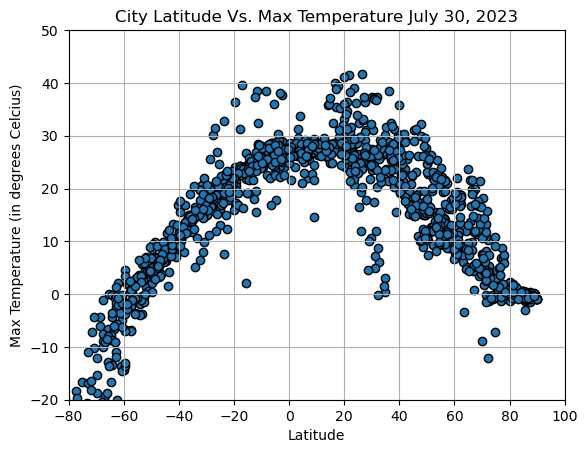

In [78]:
# Build scatter plot for latitude vs. temperature
x = city_data_df["Lat"]
y_temp = city_data_df["Max Temp"]

lat_temp = city_data_df[["Lat", "Max Temp"]]
plt.scatter(x,y_temp,edgecolors='black')

# Incorporate the other graph properties
plt.xlabel("Latitude") 
plt.ylabel("Max Temperature (in degrees Celcius)")
plt.title("City Latitude Vs. Max Temperature July 30, 2023")
plt.xlim(-80,100)
plt.ylim(-20,50)
plt.grid()

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

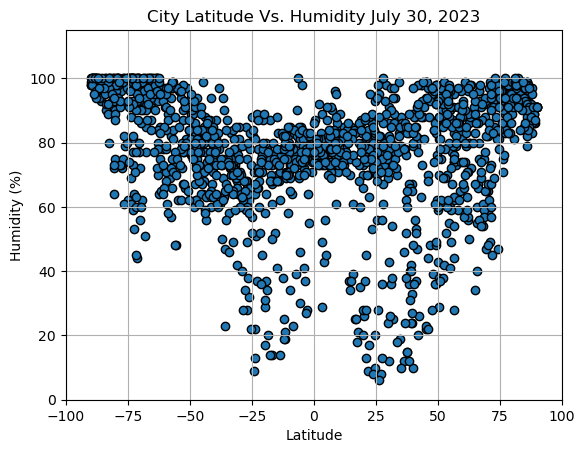

In [79]:
# Build the scatter plots for latitude vs. humidity
x = city_data_df["Lat"]
y_hum= city_data_df["Humidity"]

lat_temp = city_data_df[["Lat", "Humidity"]]
plt.scatter(x,y_hum,edgecolors='black')

# Incorporate the other graph properties
plt.xlabel("Latitude") 
plt.ylabel("Humidity (%)")
plt.title("City Latitude Vs. Humidity July 30, 2023")

plt.xlim(-100,100)
plt.ylim(0,115)
plt.grid()

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

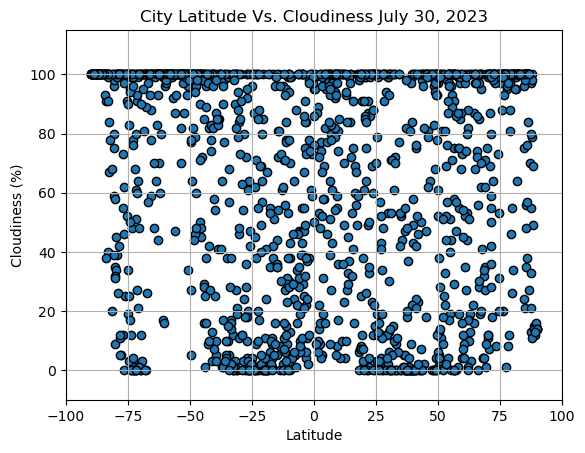

In [80]:
# Build the scatter plots for latitude vs. cloudiness
x = city_data_df["Lat"]
y_cloud = city_data_df["Cloudiness"]

lat_temp = city_data_df[["Lat", "Cloudiness"]]
plt.scatter(x,y_cloud,edgecolors='black')

# Incorporate the other graph properties
plt.xlabel("Latitude") 
plt.ylabel("Cloudiness (%)")
plt.title("City Latitude Vs. Cloudiness July 30, 2023")

plt.xlim(-100,100)
plt.ylim(-10,115)
plt.grid()

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

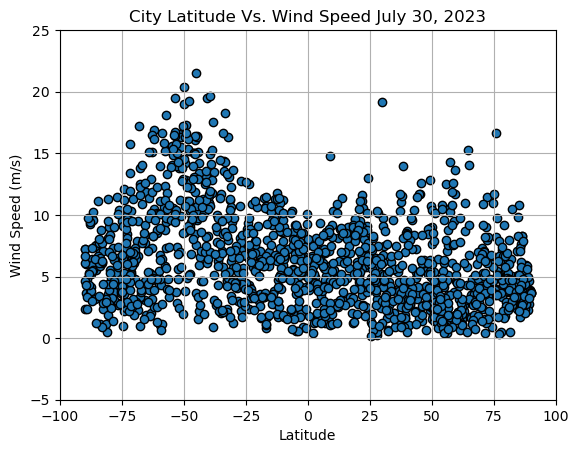

In [81]:
# Build the scatter plots for latitude vs. wind speed
x = city_data_df["Lat"]
y_wind = city_data_df["Wind Speed"]

lat_temp = city_data_df[["Lat", "Wind Speed"]]
plt.scatter(x,y_wind,edgecolors='black')

# Incorporate the other graph properties
plt.xlabel("Latitude") 
plt.ylabel("Wind Speed (m/s)")
plt.title("City Latitude Vs. Wind Speed July 30, 2023")

plt.xlim(-100,100)
plt.ylim(-5,25)
plt.grid()

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [82]:
# # Define a function in order to create the linear regression plots
# def lin_reg():
#     lin_reg()

In [83]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = pd.DataFrame(city_data_df.loc[city_data_df['Lat']>=0,:])

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
City_ID,,,,,,,,
1,akureyri,75.7387,-17.7677,0.73,83,100,3.95,1691255258
3,badger,85.9124,-143.0261,-0.96,79,38,2.92,1691255259
5,dudinka,85.9415,85.3577,0.04,99,100,5.04,1691255259
6,olonkinbyen,77.1291,-16.1385,0.93,83,100,5.23,1691255259
9,tazovsky,86.5580,76.9309,-0.02,95,100,5.51,1691255260


In [84]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = pd.DataFrame(city_data_df.loc[city_data_df['Lat']<0,:])

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
City_ID,,,,,,,,
0,carnarvon,-28.2695,98.9508,18.29,64,80,2.98,1691255258
2,kulia village,-6.0489,177.7185,28.55,76,47,5.65,1691255258
4,stanley,-74.0755,-53.5453,-33.02,100,100,2.24,1691255259
7,grytviken,-59.9131,-38.3702,-14.45,91,96,5.48,1691255259
8,port-aux-francais,-89.7287,51.2060,-38.77,98,100,7.25,1691255259


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.8550888544535683


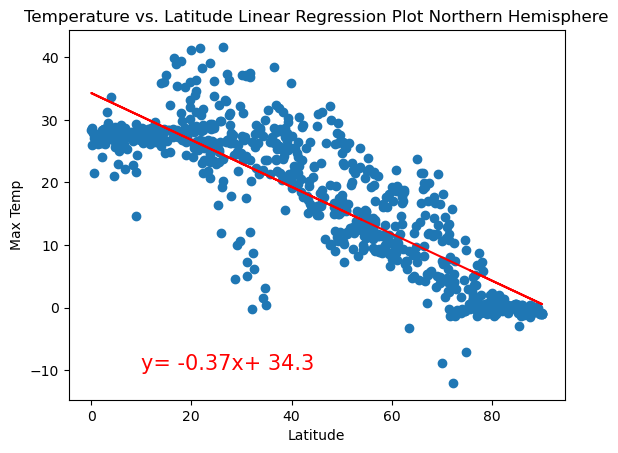

In [101]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df['Lat']

n_max_temp = northern_hemi_df['Max Temp']
n_humidity = northern_hemi_df['Humidity']
n_cloud = northern_hemi_df['Cloudiness']
n_wind = northern_hemi_df['Wind Speed']

y_values = n_max_temp

slope, intercept, rvalue, pvalue, stderr = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y= " + str(round(slope,2)) + "x+ " + str(round(intercept,2))

plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")

plt.annotate(line_eq, (10, -10), fontsize = 15, color = "red")

plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.title('Temperature vs. Latitude Linear Regression Plot Northern Hemisphere')
print(f"The r-value is: {rvalue}")

# Save the figure
plt.savefig("output_data/Fig5.png")

plt.show()

The r-value is: 0.9187348696025


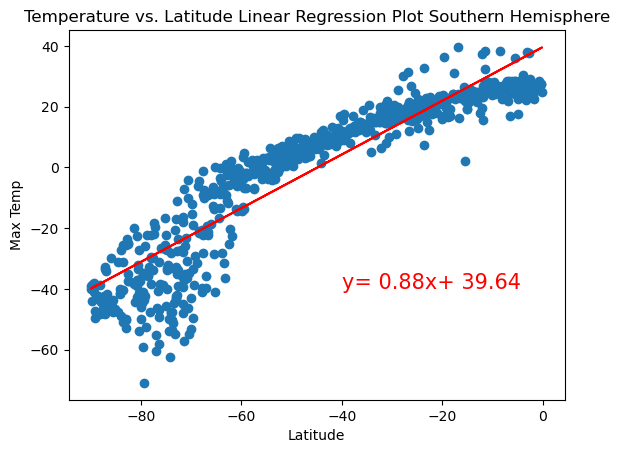

In [102]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df['Lat']

s_max_temp = southern_hemi_df['Max Temp']
s_humidity = southern_hemi_df['Humidity']
s_cloud = southern_hemi_df['Cloudiness']
s_wind = southern_hemi_df['Wind Speed']

y_values = s_max_temp

slope, intercept, rvalue, pvalue, stderr = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y= " + str(round(slope,2)) + "x+ " + str(round(intercept,2))

plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")

plt.annotate(line_eq, (-40, -40), fontsize = 15, color = "red")

plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.title('Temperature vs. Latitude Linear Regression Plot Southern Hemisphere')
print(f"The r-value is: {rvalue}")

# Save the figure
plt.savefig("output_data/Fig6.png")

plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.2897179515725892


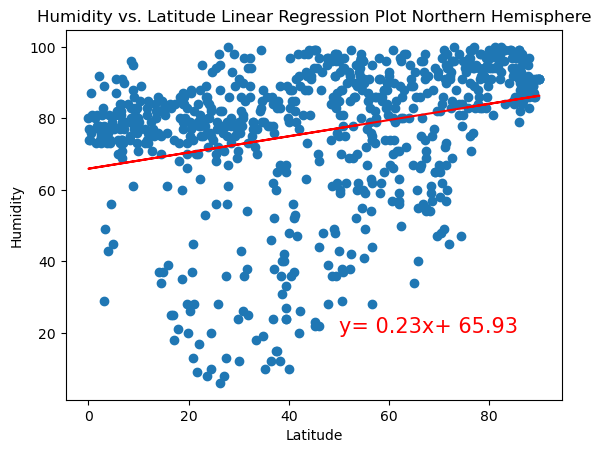

In [103]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']

n_max_temp = northern_hemi_df['Max Temp']
n_humidity = northern_hemi_df['Humidity']
n_cloud = northern_hemi_df['Cloudiness']
n_wind = northern_hemi_df['Wind Speed']

y_values = n_humidity

slope, intercept, rvalue, pvalue, stderr = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y= " + str(round(slope,2)) + "x+ " + str(round(intercept,2))

plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")

plt.annotate(line_eq, (50, 20), fontsize = 15, color = "red")

plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title('Humidity vs. Latitude Linear Regression Plot Northern Hemisphere')
print(f"The r-value is: {rvalue}")

# Save the figure
plt.savefig("output_data/Fig7.png")

plt.show()

The r-value is: -0.540655177166577


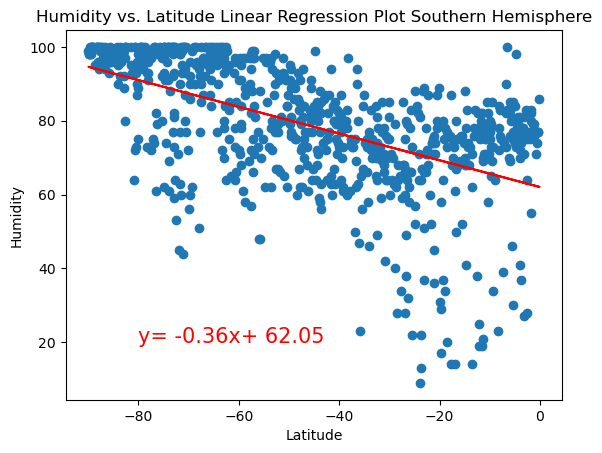

In [104]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']

s_max_temp = southern_hemi_df['Max Temp']
s_humidity = southern_hemi_df['Humidity']
s_cloud = southern_hemi_df['Cloudiness']
s_wind = southern_hemi_df['Wind Speed']

y_values = s_humidity

slope, intercept, rvalue, pvalue, stderr = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y= " + str(round(slope,2)) + "x+ " + str(round(intercept,2))

plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")

plt.annotate(line_eq, (-80, 20), fontsize = 15, color = "red")

plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title('Humidity vs. Latitude Linear Regression Plot Southern Hemisphere')
print(f"The r-value is: {rvalue}")

# Save the figure
plt.savefig("output_data/Fig8.png")

plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.1072703783220515


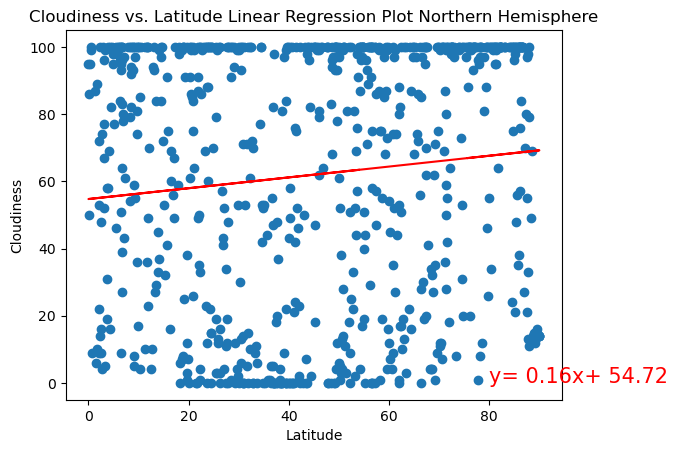

In [105]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']

n_max_temp = northern_hemi_df['Max Temp']
n_humidity = northern_hemi_df['Humidity']
n_cloud = northern_hemi_df['Cloudiness']
n_wind = northern_hemi_df['Wind Speed']

y_values = n_cloud

slope, intercept, rvalue, pvalue, stderr = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y= " + str(round(slope,2)) + "x+ " + str(round(intercept,2))

plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")

plt.annotate(line_eq, (80, 0), fontsize = 15, color = "red")

plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title('Cloudiness vs. Latitude Linear Regression Plot Northern Hemisphere')
print(f"The r-value is: {rvalue}")

# Save the figure
plt.savefig("output_data/Fig9.png")

plt.show()

The r-value is: -0.37296531910078046


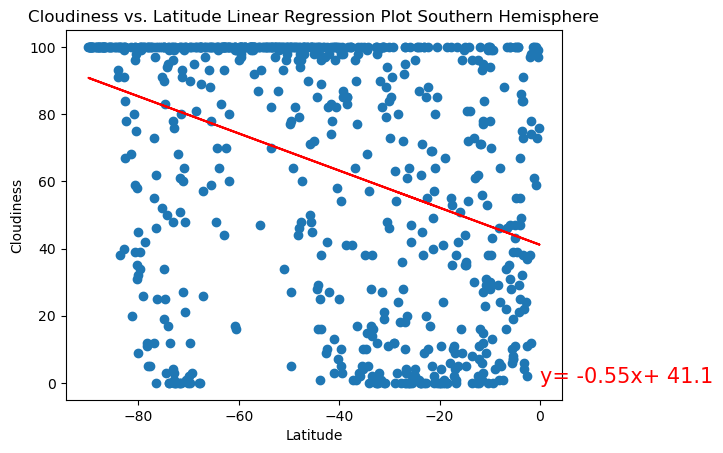

In [106]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']

s_max_temp = southern_hemi_df['Max Temp']
s_humidity = southern_hemi_df['Humidity']
s_cloud = southern_hemi_df['Cloudiness']
s_wind = southern_hemi_df['Wind Speed']

y_values = s_cloud

slope, intercept, rvalue, pvalue, stderr = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y= " + str(round(slope,2)) + "x+ " + str(round(intercept,2))

plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")

plt.annotate(line_eq, (0, 0), fontsize = 15, color = "red")

plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title('Cloudiness vs. Latitude Linear Regression Plot Southern Hemisphere')
print(f"The r-value is: {rvalue}")

# Save the figure
plt.savefig("output_data/Fig10.png")

plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: -0.12510407974677043


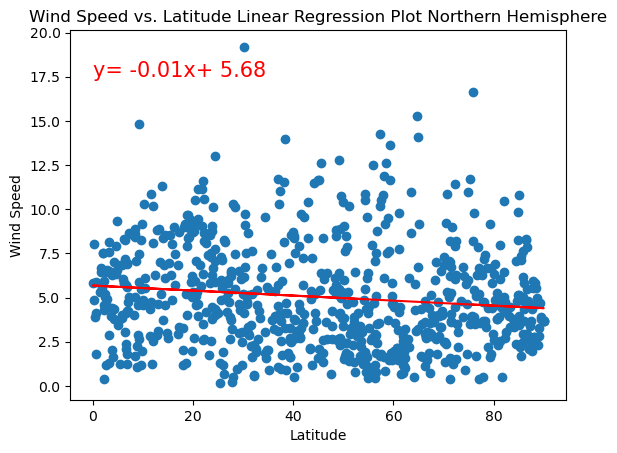

In [107]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
n_wind = northern_hemi_df['Wind Speed']

y_values = n_wind

slope, intercept, rvalue, pvalue, stderr = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y= " + str(round(slope,2)) + "x+ " + str(round(intercept,2))

plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")

plt.annotate(line_eq, (0, 17.5), fontsize = 15, color = "red")

plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title('Wind Speed vs. Latitude Linear Regression Plot Northern Hemisphere')
print(f"The r-value is: {rvalue}")

# Save the figure
plt.savefig("output_data/Fig11.png")

plt.show()

The r-value is: -0.034943594021567714


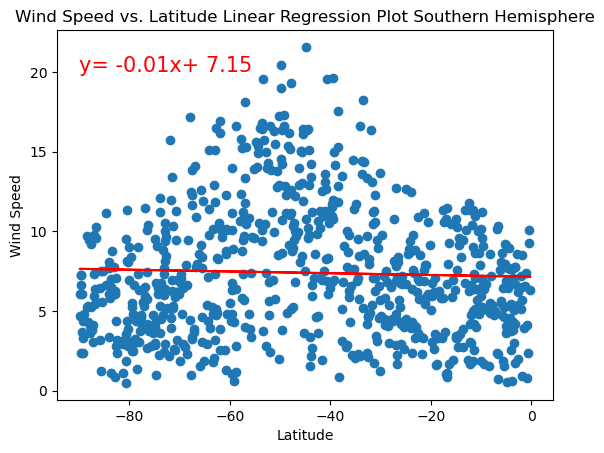

In [108]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']

s_wind = southern_hemi_df['Wind Speed']

y_values = s_wind

slope, intercept, rvalue, pvalue, stderr = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y= " + str(round(slope,2)) + "x+ " + str(round(intercept,2))

plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")

plt.annotate(line_eq, (-90, 20), fontsize = 15, color = "red")

plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title('Wind Speed vs. Latitude Linear Regression Plot Southern Hemisphere')
print(f"The r-value is: {rvalue}")

# Save the figure
plt.savefig("output_data/Fig12.png")

plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE